# PREVIOUS_APPLICATIONS EDA

Overview
This notebook presents a comprehensive exploratory data analysis (EDA) of the Previous Applications dataset, which contains historical information about applicants' prior loan applications. The primary objective is to uncover patterns, assess data quality, and identify features that influence future credit risk or application outcomes.

The dataset includes records for previous loan applications, with features describing application status, amounts, payment schedules, and more. The analysis aims to understand applicant behavior over time and how past applications may relate to current credit risk.

##  Goals of This Analysis

- Understand the distribution and quality of both categorical and numerical features  
- Identify missing values, anomalies, and rare categories  
- Explore relationships between features and the target variable  
- Detect redundant or low-impact features  
- Prepare insights for feature selection and model development



# Structure of the Notebook

- [Previous Data Loading and Preprocessing](#previous-data-loading-and-preprocessing)
- [Previous Reduce Memory](#previous-reduce-memory)
- [Previous Dataset: Statistical Summary](#previous-dataset-statistical-summary)
- [Previous Missing Value Counts](#previous-missing-value-counts)
- [Previous Application Coverage Check](#previous-application-coverage-check)
- [Previous Exploring Categorical Features](#previous-exploring-categorical-features)
- [Previous Categorical Feature Correlation with Target (Phik Analysis)](#previous-categorical-feature-correlation-with-target-phik-analysis)
- [Previous Feature Pair Correlation — Phik Analysis](#previous-feature-pair-correlation-—-phik-analysis)
- [Numeric - Previous applications](#numeric---previous-applications)
- [Previous Observations from Descriptive Statistics (Numerical Features)](#previous-observations-from-descriptive-statistics-numerical-features)
- [Previous Observation: Numerical Feature Correlation (Phi k Heatmap)](#previous-observation-numerical-feature-correlation-phik-heatmap)
- [Previous Highly Correlated Numerical Features](#previous-highly-correlated-numerical-features)
- [Distribution Analysis of Top 3 Correlated Features](#distribution-analysis-of-top-3-correlated-features)
- [Final Summary of Previous Application Analysis](#final-summary-of-previous-application-analysis)

- [Installments Data Loading and Preprocessing](#installments-data-loading-and-preprocessing)
- [Descriptive Statistics](#descriptive-statistics)
- [Installments Missing Value Counts](#installments-missing-value-counts)
- [Installments Coverage Check](#installments-coverage-check)
- [Correlation Between Features and Target](#correlation-between-features-and-target)
- [Distribution Analysis of Installments Feature](#distribution-analysis-of-installments-feature)
- [Final Summary of Installment Payments Analysis](#final-summary-of-installment-payments-analysis)

- [POS_CASH Data Loading and Reduce Memory](#pos_cash-data-loading-and-reduce-memory)
- [POS_CASH Dataset: Statistical Summary](#pos_cash-dataset-statistical-summary)
- [Missing Value Counts](#missing-value-counts)
- [Correlation Between Features and Target](#correlation-between-features-and-target-1)
- [Final Summary of POS_CASH Balance Analysis](#final-summary-of-pos_cash-balance-analysis)

- [Credit Card Balance Data Loading and Reduce Memory](#credit-card-balance-data-loading-and-reduce-memory)
- [Credit Card Balance Dataset: Statistical Summary](#credit-card-balance-dataset-statistical-summary)
- [Credit Card Balance Missing Value Counts](#credit-card-balance-missing-value-counts)
- [Credit Card Balance Coverage Check](#credit-card-balance-coverage-check)
- [Credit Card Balance Exploring Categorical Features](#credit-card-balance-exploring-categorical-features)
- [Correlation Between Numerical Features and Target](#correlation-between-numerical-features-and-target)
- [Summary of Credit Card Balance Analysis](#summary-of-credit-card-balance-analysis)









In [11]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [12]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns


from src.utils.eda_utils import (
    outliers_counts,
    reduce_memory_usage_pl,
    PhikCorrelationChecker,
    get_missing_percentages,
    get_categorical_columns,
    get_numerical_columns
)
from src.utils.plot_utils import (
    draw_heatmap,
    barplot_feature_vs_target,
    plot_feature_vs_target_and_distribution,
    

)


## Previous Data Loading and Preprocessing

In [13]:
custom_palette = sns.color_palette(["#D89864", "#89ABC7"]) 

In [14]:
application_train = pl.read_csv("../data/application_train.csv")
prev_app_df= pl.read_csv("../data/previous_application.csv")
app_ids = application_train.select(pl.col("SK_ID_CURR").unique())

## Previous Reduce memory

In [15]:
prev_app_df = reduce_memory_usage_pl(prev_app_df)

Size before reduction: 470.12 MB
Initial data types: Counter({String: 16, Float64: 15, Int64: 6})
Size after reduction: 226.18 MB
Final data types: Counter({Categorical(ordering='physical'): 16, Float32: 15, Int32: 3, Int8: 2, Int16: 1})


This reduced the memory footprint of the dataset from 470.12 MB to 226.18 MB, significantly improving efficiency and paving the way for faster processing and model training.

## Previous Dataset: Statistical Summary

In [16]:
prev_app_df.describe()

statistic,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
str,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64
"""count""",1.670214e6,1.670214e6,"""1670214""",1.297979e6,1.670214e6,1.670213e6,774370.0,1.284699e6,"""1670214""",1.670214e6,"""1670214""",1.670214e6,774370.0,5951.0,5951.0,"""1670214""","""1670214""",1.670214e6,"""1670214""","""1670214""","""849809""","""1670214""","""1670214""","""1670214""","""1670214""","""1670214""",1.670214e6,"""1670214""",1.297984e6,"""1670214""","""1669868""",997149.0,997149.0,997149.0,997149.0,997149.0,997149.0
"""null_count""",0.0,0.0,"""0""",372235.0,0.0,1.0,895844.0,385515.0,"""0""",0.0,"""0""",0.0,895844.0,1.664263e6,1.664263e6,"""0""","""0""",0.0,"""0""","""0""","""820405""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""",372230.0,"""0""","""346""",673065.0,673065.0,673065.0,673065.0,673065.0,673065.0
"""mean""",1.9231e6,278357.174099,null,15955.121094,175233.859375,196114.015625,6697.402344,227847.28125,null,12.484182,null,0.996468,0.079637,0.188357,0.773503,null,null,-880.679668,null,null,null,null,null,null,null,null,313.951115,null,16.054081,null,null,342209.84375,13826.269531,33767.773438,76582.40625,81992.34375,0.33257
"""std""",532597.958696,102814.823849,null,14782.137695,292779.75,318574.625,20921.496094,315396.5625,null,3.334028,null,0.05933,0.107823,0.087671,0.100879,null,null,779.099667,null,null,null,null,null,null,null,null,7127.443459,null,14.567287,null,null,88916.117188,72444.867188,106857.03125,149647.421875,153303.515625,0.471134
"""min""",1.000001e6,100001.0,null,0.0,0.0,0.0,-0.9,0.0,null,0.0,null,0.0,-0.000015,0.034781,0.37315,null,null,-2922.0,null,null,null,null,null,null,null,null,-1.0,null,0.0,null,null,-2922.0,-2892.0,-2801.0,-2889.0,-2874.0,0.0
"""25%""",1.461857e6,189329.0,null,6321.779785,18720.0,24160.5,0.0,50841.0,null,10.0,null,1.0,0.0,0.160716,0.715645,null,null,-1300.0,null,null,null,null,null,null,null,null,-1.0,null,6.0,null,null,365243.0,-1628.0,-1242.0,-1314.0,-1270.0,0.0
"""50%""",1.923111e6,278715.0,null,11250.0,71046.0,80541.0,1638.0,112320.0,null,12.0,null,1.0,0.051606,0.189122,0.835095,null,null,-581.0,null,null,null,null,null,null,null,null,3.0,null,12.0,null,null,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
"""75%""",2.38428e6,367514.0,null,20658.419922,180360.0,216418.5,7740.0,234000.0,null,15.0,null,1.0,0.108909,0.19333,0.852537,null,null,-280.0,null,null,null,null,null,null,null,null,82.0,null,24.0,null,null,365243.0,-411.0,129.0,-74.0,-44.0,1.0
"""max""",2.845382e6,456255.0,null,418058.15625,6.90516e6,6.90516e6,3.060045e6,6.90516e6,null,23.0,null,1.0,1.0,1.0,1.0,null,null,-1.0,null,null,null,null,null,null,null,null,4e6,null,84.0,null,null,365243.0,365243.0,365243.0,365243.0,365243.0,1.0


## Quantitative Observations from `previous_application`

- **Dataset Size**  
  The dataset contains over **1.67 million previous loan applications**, each linked to a current client via `SK_ID_CURR`.

- **Loan Amounts**  
  - `AMT_APPLICATION`: Mean ≈ 175,234; Max ≈ 6.9M; Std Dev ≈ 292,780  
    → Wide range of requested amounts, indicating diverse borrowing needs.  
  - `AMT_CREDIT`: Mean ≈ 196,114; Max ≈ 6.9M  
    → Slightly higher than requested amounts, possibly due to fees or rounding.  
  - `AMT_DOWN_PAYMENT`: Mean ≈ 6,697; Max ≈ 3.06M; ~54% missing  
    → Some negative values suggest data entry issues or placeholders.

- **Annuity & Installments**  
  - `AMT_ANNUITY`: Mean ≈ 15,955; Max ≈ 418,058; ~22% missing  
  - `CNT_PAYMENT`: Mean ≈ 16; Max = 84  
    → Indicates a mix of short- and long-term loans.

- **Goods Price**  
  - `AMT_GOODS_PRICE`: Mean ≈ 227,847; Max ≈ 6.9M; ~23% missing  
    → Likely reflects the value of financed items in POS loans.

- **Interest Rates**  
  - `RATE_INTEREST_PRIMARY`: Mean ≈ 0.188; Count ≈ 5,951  
  - `RATE_INTEREST_PRIVILEGED`: Mean ≈ 0.773; Count ≈ 5,951  
    → Nearly all values missing (~99.6%), but available entries show high rates.

- **Application Timing**  
  - `DAYS_DECISION`: Mean ≈ -881 days  
    → Most previous applications occurred ~2.4 years before the current one.  
  - `DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE`, `DAYS_TERMINATION`: ~40% missing  
    → Suggests many applications were rejected or never executed.

- **Flags & Ratios**  
  - `FLAG_LAST_APPL_PER_CONTRACT` and `NFLAG_LAST_APPL_IN_DAY` are mostly 1  
    → Most entries represent the final application per contract and the only one submitted that day.  
  - `RATE_DOWN_PAYMENT`: Mean ≈ 0.08; Max = 1.0  
    → Mostly low, with rare cases of full upfront payments.

- **Outliers & Data Quality**  
  - Several fields contain extreme values (e.g., `DAYS_TERMINATION` = 365,243)  
    → Likely placeholders or capped values.  
  - Negative values in financial and date fields may require cleaning or special handling.


## Previous Missing Value Counts

In [17]:
missing_data = get_missing_percentages(prev_app_df)
missing_data.sort("missing_percentage", descending=True).head(17)

feature,missing_percentage
str,f64
"""RATE_INTEREST_PRIMARY""",99.643698
"""RATE_INTEREST_PRIVILEGED""",99.643698
"""AMT_DOWN_PAYMENT""",53.63648
"""RATE_DOWN_PAYMENT""",53.63648
"""NAME_TYPE_SUITE""",49.119754
…,…
"""AMT_ANNUITY""",22.286665
"""CNT_PAYMENT""",22.286366
"""PRODUCT_COMBINATION""",0.020716


### Missing Values Observation

1. Approximately **50% of the columns** in the dataset contain missing values, indicating a significant amount of incomplete data.

2. The columns `RATE_INTEREST_PRIMARY` and `RATE_INTEREST_PRIVILEGED` each have **1,664,263 missing entries**, which accounts for **99.6% of the dataset**. These features are nearly unusable without heavy imputation or exclusion.

3. Several other columns—such as `AMT_DOWN_PAYMENT`, `AMT_GOODS_PRICE`, and the various `DAYS_*` fields—also exhibit **missing rates around 40–50%**, suggesting that many previous applications were either rejected, canceled, or never executed.

> These missing values should be carefully handled during preprocessing, either through imputation, exclusion, or feature engineering to avoid introducing bias or noise into the model.

## Previous Application Coverage Check

Next, I evaluated how many applicants in the training dataset have corresponding records in the **Previous Application** dataset. This helps assess the completeness of internal loan history data from Home Credit Group.

In [18]:
prev_app_ids = prev_app_df.select(pl.col('SK_ID_CURR').unique())
app_clients_count = application_train.select(pl.col('SK_ID_CURR').unique())
total_applicants = application_train['SK_ID_CURR'].n_unique()


In [19]:
print('Shape of Previous application', prev_app_df.shape)
print('Count of Current application in train', total_applicants)
print('Count of Unique Previous loan ID', len(prev_app_ids))

app_with_prev = (
    application_train.join(prev_app_ids, on='SK_ID_CURR', how='inner')
)
print(f'Count of current applicant who already got from Home Credit {len(app_with_prev)}')
print('New applicant in train who apply loan for first time Home credit ', total_applicants - len(app_with_prev))


Shape of Previous application (1670214, 37)
Count of Current application in train 307511
Count of Unique Previous loan ID 338857
Count of current applicant who already got from Home Credit 291057
New applicant in train who apply loan for first time Home credit  16454


### Previous Checks Performed:

- **Shape of Previous Application Dataset**:  
  `(1,670,214 rows × 37 columns)` — each row represents a past loan application submitted by a client.

- **Current Applications in Training Set**:  
  `307,511` applicants in the main training dataset.

- **Unique Previous Loan IDs (`SK_ID_PREV`)**:  
  `338,857` distinct loan applications previously submitted to Home Credit.

- **Applicants with Previous Home Credit History**:  
  `291,057` current applicants have at least one previous loan record.

- **New Applicants (No Prior Home Credit Loans)**:  
  `16,454` applicants in the training set are applying for the **first time** with Home Credit.


In [20]:
duplicated = prev_app_df.filter(prev_app_df.is_duplicated())
duplicated

SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
i32,i32,cat,f32,f32,f32,f32,f32,cat,i8,cat,i8,f32,f32,f32,cat,cat,i16,cat,cat,cat,cat,cat,cat,cat,cat,i32,cat,f32,cat,cat,f32,f32,f32,f32,f32,f32


Now, I will filter out records that do not belong to applicants in the training set. Since this information is currently irrelevant to my analysis, I’ll proceed only with those who have a documented history with Home Credit.

In [21]:
ids_list = app_with_prev['SK_ID_CURR'].to_list()
clean_prev_app = prev_app_df.filter(pl.col('SK_ID_CURR').is_in(ids_list))
clean_prev_app

SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
i32,i32,cat,f32,f32,f32,f32,f32,cat,i8,cat,i8,f32,f32,f32,cat,cat,i16,cat,cat,cat,cat,cat,cat,cat,cat,i32,cat,f32,cat,cat,f32,f32,f32,f32,f32,f32
2030495,271877,"""Consumer loans""",1730.430054,17145.0,17145.0,0.0,17145.0,"""SATURDAY""",15,"""Y""",1,0.0,0.182832,0.867336,"""XAP""","""Approved""",-73,"""Cash through the bank""","""XAP""",null,"""Repeater""","""Mobile""","""POS""","""XNA""","""Country-wide""",35,"""Connectivity""",12.0,"""middle""","""POS mobile with interest""",365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,"""Cash loans""",25188.615234,607500.0,679671.0,null,607500.0,"""THURSDAY""",11,"""Y""",1,null,null,null,"""XNA""","""Approved""",-164,"""XNA""","""XAP""","""Unaccompanied""","""Repeater""","""XNA""","""Cash""","""x-sell""","""Contact center""",-1,"""XNA""",36.0,"""low_action""","""Cash X-Sell: low""",365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,"""Cash loans""",15060.735352,112500.0,136444.5,null,112500.0,"""TUESDAY""",11,"""Y""",1,null,null,null,"""XNA""","""Approved""",-301,"""Cash through the bank""","""XAP""","""Spouse, partner""","""Repeater""","""XNA""","""Cash""","""x-sell""","""Credit and cash offices""",-1,"""XNA""",12.0,"""high""","""Cash X-Sell: high""",365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,"""Cash loans""",47041.335938,450000.0,470790.0,null,450000.0,"""MONDAY""",7,"""Y""",1,null,null,null,"""XNA""","""Approved""",-512,"""Cash through the bank""","""XAP""",null,"""Repeater""","""XNA""","""Cash""","""x-sell""","""Credit and cash offices""",-1,"""XNA""",12.0,"""middle""","""Cash X-Sell: middle""",365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,"""Cash loans""",31924.394531,337500.0,404055.0,null,337500.0,"""THURSDAY""",9,"""Y""",1,null,null,null,"""Repairs""","""Refused""",-781,"""Cash through the bank""","""HC""",null,"""Repeater""","""XNA""","""Cash""","""walk-in""","""Credit and cash offices""",-1,"""XNA""",24.0,"""high""","""Cash Street: high""",null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1662353,443544,"""Cash loans""",12607.875,112500.0,112500.0,0.0,112500.0,"""MONDAY""",10,"""Y""",1,0.0,null,null,"""XNA""","""Refused""",-2514,"""Cash through the bank""","""SCO""","""Unaccompanied""","""Repeater""","""XNA""","""Cash""","""walk-in""","""Credit and cash offices""",100,"""XNA""",12.0,"""high""","""Cash Street: high""",null,null,null,null,null,null
1556789,209732,"""Cash loans""",22299.390625,315000.0,436216.5,null,315000.0,"""THURSDAY""",17,"""Y""",1,null,null,null,"""XNA""","""Approved""",-1279,"""Cash through the bank""","""XAP""","""Unaccompanied""","""Refreshed""","""XNA""","""Cash""","""x-sell""","""Credit and cash offices""",100,"""XNA""",36.0,"""middle""","""Cash X-Sell: middle""",365243.0,-1249.0,-199.0,-919.0,-912.0,1.0
2659632,249544,"""Consumer loans""",11520.855469,105237.0,102523.5,10525.5,105237.0,"""MONDAY""",12,"""Y""",1,0.101401,null,null,"""XAP""","""Approved""",-1488,"""Cash through the bank""","""XAP""","""Spouse, partner""","""Repeater""","""Consumer Electronics""","""POS""","""XNA""","""Country-wide""",1370,"""Consumer electronics""",10.0,"""low_normal""","""POS household with interest""",365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0


### Merging Target with Previous Applications

To enrich the previous application dataset with outcome labels, I merged it with the training application data using the applicant ID. This allows us to associate each past loan record with the target variable. A descriptive title was assigned to the resulting dataset for clarity in further analysis.


In [22]:
pre_app_train_merged  =clean_prev_app.join(app_with_prev.select(['SK_ID_CURR', 'TARGET']), on='SK_ID_CURR', how='left')

In [23]:
pre_app_train_merged.head(2)

SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
i32,i32,cat,f32,f32,f32,f32,f32,cat,i8,cat,i8,f32,f32,f32,cat,cat,i16,cat,cat,cat,cat,cat,cat,cat,cat,i32,cat,f32,cat,cat,f32,f32,f32,f32,f32,f32,i64
2030495,271877,"""Consumer loans""",1730.430054,17145.0,17145.0,0.0,17145.0,"""SATURDAY""",15,"""Y""",1,0.0,0.182832,0.867336,"""XAP""","""Approved""",-73,"""Cash through the bank""","""XAP""",null,"""Repeater""","""Mobile""","""POS""","""XNA""","""Country-wide""",35,"""Connectivity""",12.0,"""middle""","""POS mobile with interest""",365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
2802425,108129,"""Cash loans""",25188.615234,607500.0,679671.0,null,607500.0,"""THURSDAY""",11,"""Y""",1,null,null,null,"""XNA""","""Approved""",-164,"""XNA""","""XAP""","""Unaccompanied""","""Repeater""","""XNA""","""Cash""","""x-sell""","""Contact center""",-1,"""XNA""",36.0,"""low_action""","""Cash X-Sell: low""",365243.0,-134.0,916.0,365243.0,365243.0,1.0,0


## Previous Exploring Categorical Features
This section summarizes the distribution and cardinality of key categorical features in the previous application dataset. These features help describe the nature of past loans, client profiles, and application outcomes.


In [24]:
prev_app_df_pd =  pre_app_train_merged.to_pandas()

In [25]:
cat_prev = get_categorical_columns(pre_app_train_merged)

In [27]:
categorical_prev = prev_app_df_pd.select_dtypes(include='category').columns.to_list()

prev_app_df_pd[categorical_prev].describe()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1413701,1413701,1413701,1413701,1413701,1413701,1413701,719029,1413701,1413701,1413701,1413701,1413701,1413701,1413701,1413388
unique,4,7,2,25,4,4,9,7,4,27,5,3,8,11,5,17
top,Cash loans,WEDNESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,626764,215519,1406387,786937,886099,882700,1145533,427635,1037682,797209,592460,900053,600342,715322,429198,235101


###  Previous Categorical feature Observations

- **Dominant Contract Type**: Most previous loans were **Cash loans**, suggesting a preference for direct borrowing over revolving credit.
- **Application Timing**: Wednesday is the most common day for application processing.
- **Final Application Flag**: Nearly all entries are marked as the last application per contract (`Y`), indicating clean record keeping.
- **Loan Purpose**: The most frequent loan purpose is coded as `XAP`, which may require decoding or grouping for clarity.
- **Approval Status**: Over **62%** of applications were approved, which is a strong signal for modeling repayment behavior.
- **Client Type**: Majority are **Repeat clients**, which may correlate with trust or risk tolerance.
- **Missing or Placeholder Values**: Many features have `XNA` or `XAP` as top values, likely placeholders or unknown categories—these should be handled carefully during preprocessing.

### Previous Correlation Between Categorical Features and Target

Next, I examine how each categorical feature is correlated with the `TARGET` variable. This helps identify which categories are strong indicators of loan repayment behavior and can be valuable for predictive modeling.


In [28]:
cat_checker_prev  = PhikCorrelationChecker(
    prev_app_df_pd[categorical_prev +['TARGET']],
    target_col='TARGET'
)

In [29]:
cat_corr_prev = cat_checker_prev.get_correlations()

interval columns not set, guessing: ['TARGET']


In [30]:
sorted_corr = cat_corr_prev.sort_values(by='phik_correlation', ascending=False)
sorted_corr


,feature,phik_correlation
4,NAME_CONTRACT_STATUS,0.088266
15,PRODUCT_COMBINATION,0.063839
6,CODE_REJECT_REASON,0.062771
0,NAME_CONTRACT_TYPE,0.050858
12,CHANNEL_TYPE,0.050302
9,NAME_GOODS_CATEGORY,0.046496
3,NAME_CASH_LOAN_PURPOSE,0.040305
5,NAME_PAYMENT_TYPE,0.039752
13,NAME_SELLER_INDUSTRY,0.038077
14,NAME_YIELD_GROUP,0.034626


### Previous Categorical Feature Correlation with Target (Phik Analysis)

This section summarizes the strength of association between categorical features and the target variable using **Phik correlation**, which captures both linear and non-linear relationships.

### High Correlation — Strong Predictive Power

| Feature                 | Phik Correlation | Insight |
|------------------------|------------------|--------|
| `NAME_CONTRACT_STATUS` | **0.088**        | Most predictive feature. Status like *Approved*, *Refused*, or *Canceled* strongly reflects creditworthiness. |
| `PRODUCT_COMBINATION`  | **0.064**        | Indicates how product bundling (e.g., cash + POS) relates to risk. Useful for portfolio segmentation. |
| `CODE_REJECT_REASON`   | **0.063**        | Rejection codes (e.g., *SCO*, *HC*) are strong signals of prior risk. Valuable for pre-screening. |


### Moderate Correlation — Useful but Less Dominant

| Feature                 | Phik Correlation | Insight |
|------------------------|------------------|--------|
| `NAME_CONTRACT_TYPE`   | 0.051            | *Cash loans* vs *Revolving loans* show different risk profiles. Still relevant. |
| `CHANNEL_TYPE`         | 0.050            | Application channel (e.g., *Credit office*, *Contact center*) may reflect client behavior or acquisition strategy. |
| `NAME_GOODS_CATEGORY`  | 0.046            | Type of goods financed (e.g., electronics, furniture) shows moderate risk variation. |
| `NAME_CASH_LOAN_PURPOSE`| 0.040           | Purpose of loan (e.g., *Repairs*, *Education*) has some predictive value. |
| `NAME_PAYMENT_TYPE`    | 0.040            | Payment method (e.g., *Cash through bank*) may reflect financial discipline. |
| `NAME_SELLER_INDUSTRY` | 0.038            | Seller industry has weak but noticeable influence. May benefit from grouping. |
| `NAME_YIELD_GROUP`     | 0.035            | Yield group (e.g., *High*, *Low*) shows some signal, but many values are placeholders. |


### Low Correlation — Limited Predictive Value

| Feature                        | Phik Correlation | Insight |
|-------------------------------|------------------|--------|
| `NAME_PORTFOLIO`              | 0.028            | Weak signal. May be useful in combination with other features. |
| `NAME_PRODUCT_TYPE`           | 0.026            | Low standalone value. Consider combining with product combination. |
| `NAME_CLIENT_TYPE`            | 0.022            | *New* vs *Repeater* clients show slight risk difference. |
| `NAME_TYPE_SUITE`             | 0.017            | Who accompanied the client has minimal impact. Often missing. |
| `FLAG_LAST_APPL_PER_CONTRACT`| 0.009            | Very low correlation. Likely not useful for prediction. |
| `WEEKDAY_APPR_PROCESS_START` | 0.008            | Day of application has negligible effect on outcome. |



### Summary

- **Top 3 features** (`NAME_CONTRACT_STATUS`, `PRODUCT_COMBINATION`, `CODE_REJECT_REASON`) should be prioritized in modeling.
- Features with **Phik < 0.02** may be dropped or grouped unless they show interaction effects.
- Placeholder values like `XNA`, `XAP` should be handled carefully to avoid misleading correlations.

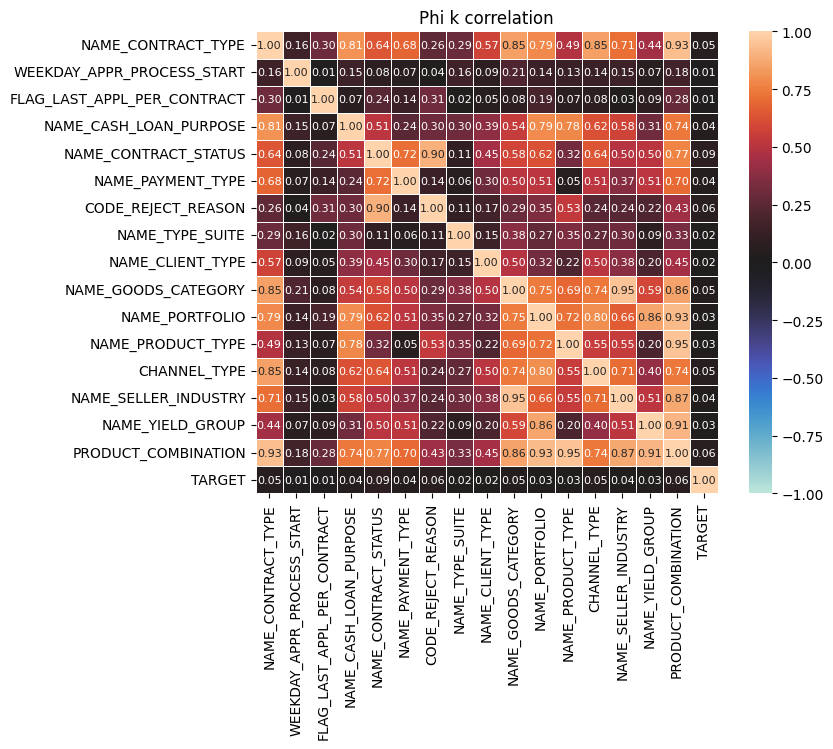

In [31]:
draw_heatmap(
    data=cat_checker_prev.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='Phi k correlation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

In [32]:
independed_feature_corr = cat_checker_prev.get_feature_feature_correlations()
independed_feature_corr.sort_values(by='phik_correlation', ascending=False).head(20)

,feature_1,feature_2,phik_correlation
124,NAME_PRODUCT_TYPE,PRODUCT_COMBINATION,0.948463
111,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,0.947390
14,NAME_CONTRACT_TYPE,PRODUCT_COMBINATION,0.930963
119,NAME_PORTFOLIO,PRODUCT_COMBINATION,0.929613
133,NAME_YIELD_GROUP,PRODUCT_COMBINATION,0.910619
59,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,0.896225
131,NAME_SELLER_INDUSTRY,PRODUCT_COMBINATION,0.867343
118,NAME_PORTFOLIO,NAME_YIELD_GROUP,0.862767
113,NAME_GOODS_CATEGORY,PRODUCT_COMBINATION,0.856419
11,NAME_CONTRACT_TYPE,CHANNEL_TYPE,0.848438


### Previous Feature Pair Correlation — Phik Analysis

This section explores the **interdependence between categorical features** using Phik correlation. High values suggest strong associations, which may indicate redundancy or multicollinearity in modeling.

### Highly Correlated Feature Pairs (Phik > 0.85)

| Feature 1             | Feature 2             | Phik Correlation | Insight |
|-----------------------|-----------------------|------------------|---------|
| `NAME_PRODUCT_TYPE`   | `PRODUCT_COMBINATION` | **0.948**        | Strong overlap. Product type is often embedded in product combination. |
| `NAME_GOODS_CATEGORY` | `NAME_SELLER_INDUSTRY`| **0.947**        | Seller industry closely tied to goods category. May be redundant. |
| `NAME_CONTRACT_TYPE`  | `PRODUCT_COMBINATION` | **0.931**        | Contract type influences product packaging. High dependency. |
| `NAME_PORTFOLIO`      | `PRODUCT_COMBINATION` | **0.930**        | Portfolio and product combination are tightly linked. |
| `NAME_YIELD_GROUP`    | `PRODUCT_COMBINATION` | **0.911**        | Yield group often reflects product structure. |
| `NAME_CONTRACT_STATUS`| `CODE_REJECT_REASON`  | **0.896**        | Rejection reason strongly tied to contract outcome. |
| `NAME_SELLER_INDUSTRY`| `PRODUCT_COMBINATION` | **0.867**        | Seller type influences product offering. |
| `NAME_PORTFOLIO`      | `NAME_YIELD_GROUP`    | **0.863**        | Portfolio and yield group are closely related. |
| `NAME_GOODS_CATEGORY` | `PRODUCT_COMBINATION` | **0.856**        | Goods category embedded in product packaging. |

---

### Moderately Correlated Pairs (Phik ≈ 0.75–0.85)

| Feature 1             | Feature 2             | Phik Correlation | Insight |
|-----------------------|-----------------------|------------------|---------|
| `NAME_CONTRACT_TYPE`  | `CHANNEL_TYPE`        | 0.848            | Contract type varies by acquisition channel. |
| `NAME_CONTRACT_TYPE`  | `NAME_GOODS_CATEGORY` | 0.847            | Type of contract influences goods financed. |
| `NAME_CONTRACT_TYPE`  | `NAME_CASH_LOAN_PURPOSE`| 0.808          | Loan purpose varies by contract type. |
| `NAME_PORTFOLIO`      | `CHANNEL_TYPE`        | 0.797            | Portfolio distribution differs across channels. |
| `NAME_CASH_LOAN_PURPOSE`| `NAME_PORTFOLIO`    | 0.790            | Purpose of loan tied to portfolio type. |
| `NAME_CONTRACT_TYPE`  | `NAME_PORTFOLIO`      | 0.787            | Contract type influences portfolio assignment. |
| `NAME_CASH_LOAN_PURPOSE`| `NAME_PRODUCT_TYPE` | 0.776            | Loan purpose reflects product type. |
| `NAME_CONTRACT_STATUS`| `PRODUCT_COMBINATION` | 0.772            | Status varies by product combination. |
| `NAME_GOODS_CATEGORY` | `NAME_PORTFOLIO`      | 0.746            | Goods category linked to portfolio. |
| `NAME_CASH_LOAN_PURPOSE`| `PRODUCT_COMBINATION`| 0.741          | Purpose embedded in product packaging. |
| `CHANNEL_TYPE`        | `PRODUCT_COMBINATION` | 0.740            | Channel influences product offering. |

---

### Summary & Modeling Implications

- Many features are **strongly interdependent**, especially those related to product structure, contract type, and portfolio.
- Consider **dropping or combining** highly correlated features to reduce multicollinearity.
- For tree-based models, redundancy is less harmful but still affects interpretability.

### NAME_CONTRACT_STATUS vs TARGET Analysis

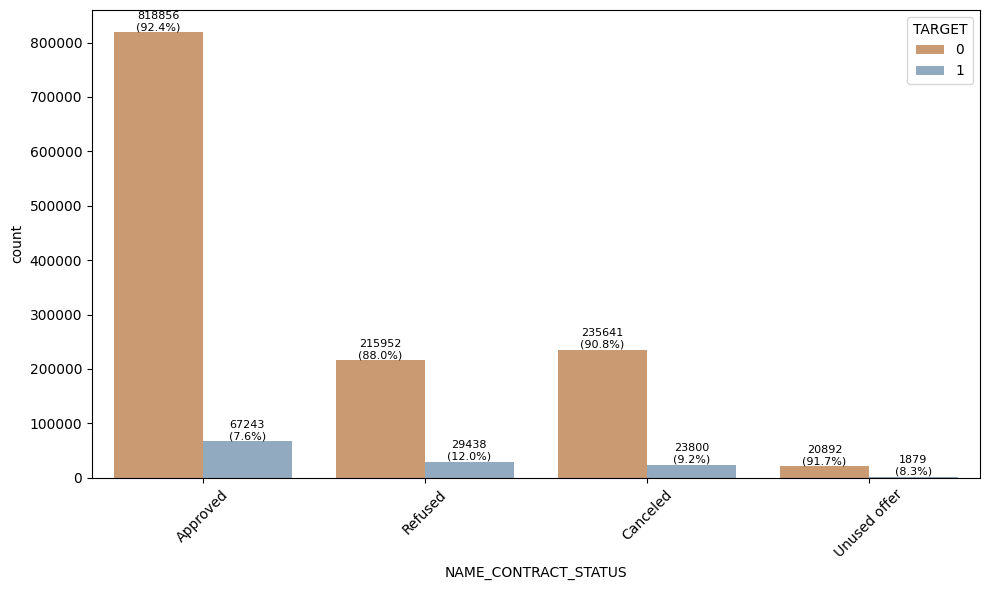

In [36]:

barplot_feature_vs_target(
        target = 'TARGET',
        df=prev_app_df_pd,
        feature='NAME_CONTRACT_STATUS',
        palette=custom_palette

        )

## Observations & Findings — Contract Status vs Target



### Key Observations

1. **Approved Contracts Dominate**  
   - `Approved`: 818,356 instances with TARGET = 0 (92.4%)  
   - Only 7.6% of approved contracts are associated with TARGET = 1  
   - Suggests that approved contracts are generally low-risk

2. **Refused Contracts Show Higher Risk**  
   - `Refused`: 29,438 instances with TARGET = 1 (12.0%)  
   - This is the highest proportion of TARGET = 1 among all statuses  
   - Indicates that refusal may be a strong signal of underlying risk

3. **Canceled Contracts Are Mostly Low-Risk**  
   - `Canceled`: 23,800 instances with TARGET = 1 (9.2%)  
   - Slightly higher risk than approved, but still predominantly TARGET = 0

4. **Unused Offers Have Minimal Impact**  
   - `Unused offer`: 1,879 instances with TARGET = 1 (8.3%)  
   - Low volume and low risk—may be less relevant for modeling

5. **Overall Trend**  
   - Across all statuses, the majority of instances fall under TARGET = 0  
   - However, `Refused` status stands out with the highest relative risk

###  CODE_REJECT_REASON vs TARGET Analysis

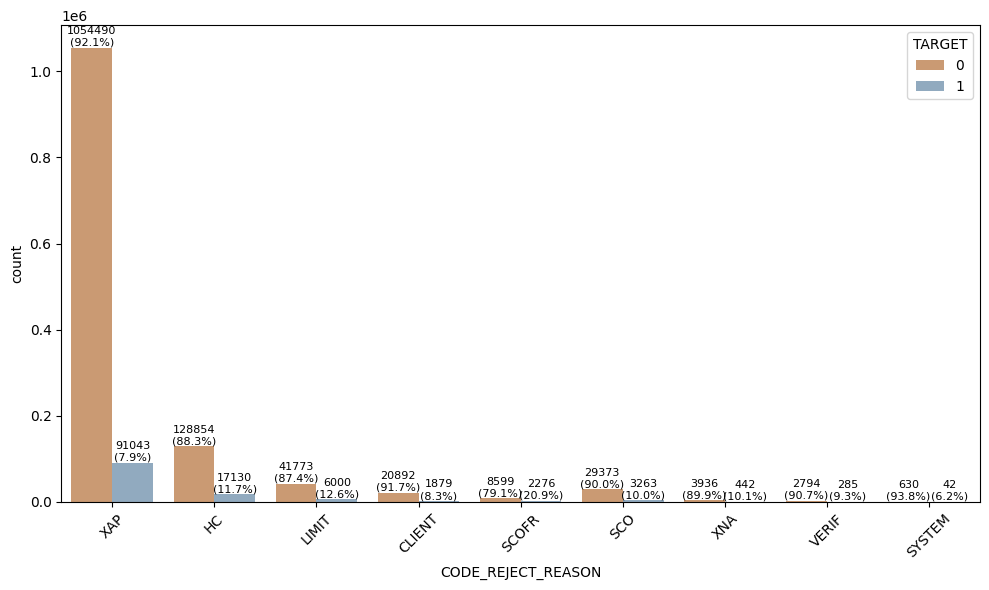

In [38]:
barplot_feature_vs_target(
        target = 'TARGET',
        df=prev_app_df_pd,
        feature='CODE_REJECT_REASON',
        palette=custom_palette
        )

## Insights from CODE_REJECT_REASON vs TARGET

This analysis explores how different rejection reasons relate to the likelihood of default, as indicated by the TARGET variable.

### 1. XAP – Most Frequent but Low Risk
- **Volume**: Over 1 million cases
- **Default Rate (TARGET = 1)**: 8.6%
- **Insight**: While XAP dominates in frequency, it shows low predictive power for default.

### 2. CLIENT – High Risk Indicator
- **Default Rate**: 17.3%
- **Insight**: Highest proportion of TARGET = 1, suggesting strong correlation with future default behavior.

### 3. HC – Elevated Risk
- **Default Rate**: 11.7%
- **Insight**: Indicates heightened risk, possibly due to personalized rejection criteria.

### 4. SYSTEM – Low Risk
- **Default Rate**: 6.2%
- **Insight**: Likely reflects procedural or technical rejections, not applicant risk.

### 5. Other Notable Codes
- **VERIF, NVA, SCO, SCOR**: Moderate volume, low-to-mid default rates
- **Insight**: May carry useful signals when combined with other features.

## Modeling Implications
- `CODE_REJECT_REASON` is a valuable categorical feature for predictive modeling.
- Consider using **target encoding** or grouping by **risk tiers**.
- High-risk codes like `CLIENT` and `HC` can be flagged for enhanced monitoring or early warning systems.


Next, I check `PRODUCT_COMBINATION`

In [39]:
prev_app_df_pd['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              235101
POS household with interest       226464
POS mobile with interest          190850
Cash X-Sell: middle               120036
Cash X-Sell: low                  110599
Card Street                        94594
POS industry with interest         83508
POS household without interest     71519
Card X-Sell                        66774
Cash Street: high                  51699
Cash X-Sell: high                  50802
Cash Street: middle                29934
Cash Street: low                   28593
POS other with interest            20309
POS mobile without interest        19890
POS industry without interest      10621
POS others without interest         2095
Name: count, dtype: int64

## Feature Summary: PRODUCT_COMBINATION

This feature captures the type of financial product combinations offered to clients. The distribution reveals key trends in product popularity and strategic positioning.

### 1. Cash Products Dominate
- **Cash** is the most frequent product with **235,101 cases**.
- Additional cash offerings like `Cash X-Sell` and `Cash Street` appear across tiers (high, middle, low), indicating strong demand for cash-based products.

### 2. POS Products with Interest Are Popular
- `POS household with interest` (**226,464**) and `POS mobile with interest` (**190,850**) are widely adopted.
- Suggests customers prefer interest-bearing POS financing, especially for household and mobile purchases.

### 3. Effective Cross-Sell Strategies
- `Cash X-Sell: middle` and `Cash X-Sell: low` together exceed **230,000 cases**, showing successful bundling.
- `Card X-Sell` also shows moderate traction with **66,774 cases**.

### 4. Interest-Free POS Products Are Less Common
- `POS household/mobile/industry without interest` have significantly lower counts.
- Indicates lower customer uptake or limited availability of interest-free financing.

### 5. Niche and Rare Combinations
- `POS others without interest` is the least frequent with only **2,095 cases**.
- May reflect legacy offerings or specialized use cases.


In [ ]:
categorical_feature = prev_app_df_pd[categorical_prev]

## Numeric - Previous applications

In [40]:
num_cols = prev_app_df_pd.drop(columns=['SK_ID_CURR', 'SK_ID_PREV']).select_dtypes(include='number').columns.to_list()
num_cols

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'TARGET']

In [41]:
prev_app_df_pd[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1106483 non-null  float32
 1   AMT_APPLICATION            1413701 non-null  float32
 2   AMT_CREDIT                 1413700 non-null  float32
 3   AMT_DOWN_PAYMENT           664161 non-null   float32
 4   AMT_GOODS_PRICE            1094176 non-null  float32
 5   HOUR_APPR_PROCESS_START    1413701 non-null  int8   
 6   NFLAG_LAST_APPL_IN_DAY     1413701 non-null  int8   
 7   RATE_DOWN_PAYMENT          664161 non-null   float32
 8   RATE_INTEREST_PRIMARY      4791 non-null     float32
 9   RATE_INTEREST_PRIVILEGED   4791 non-null     float32
 10  DAYS_DECISION              1413701 non-null  int16  
 11  SELLERPLACE_AREA           1413701 non-null  int32  
 12  CNT_PAYMENT                1106488 non-null  float32
 13  DAYS_FIRST_D

In [42]:
prev_app_df_pd[num_cols].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
count,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.583719e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656250,13488.742188,33274.832031,76665.632812,82353.179688,0.330572,8.655296e-02
std,1.472491e+04,2.936222e+05,3.194812e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.265625,71650.148438,106161.773438,149704.718750,153537.062500,0.470419,2.811789e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,6.257857e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,0.000000e+00
50%,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,0.000000e+00
75%,2.042077e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,0.193330,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,0.000000e+00
max,4.180582e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,1.000000e+00


## Previous Observations from Descriptive Statistics (Numerical Features)

This summary highlights patterns, anomalies, and modeling considerations based on the statistical profile of the dataset.

### General Structure
- **Total entries**: 1,413,701
- **Numerical columns**: 20
- **Memory usage**: ~102.5 MB
- **Data types**: Mostly `float32`, with some `int8`, `int16`, `int32`, and `int64`

### Financial Amounts
- `AMT_APPLICATION`, `AMT_CREDIT`, and `AMT_GOODS_PRICE` have full or near-full coverage.
- `AMT_DOWN_PAYMENT` is missing in over **50%** of rows.
- **Max values** (e.g., `AMT_APPLICATION` = 5.85M) suggest presence of outliers.
- **Mean vs Median** gaps indicate right-skewed distributions.

###  Time & Process Features
- `HOUR_APPR_PROCESS_START`: Ranges from 0 to 23, with a mean around 12.5 — midday is the most common application time.
- `DAYS_DECISION`: Negative values likely represent days before a reference date (e.g., application or approval).
- `DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE`, etc. show many missing values and large negative ranges — may require normalization or imputation.


###  Rates & Flags
- `RATE_DOWN_PAYMENT`, `RATE_INTEREST_PRIMARY`, and `RATE_INTEREST_PRIVILEGED` have **very low coverage** (only ~4,791 rows).
- `NFLAG_LAST_APPL_IN_DAY` and `NFLAG_INSURED_ON_APPROVAL` are binary flags (0/1), with skewed distributions:
  - `NFLAG_LAST_APPL_IN_DAY`: Mostly 1s
  - `NFLAG_INSURED_ON_APPROVAL`: Mostly 0s

### Payment Structure
- `CNT_PAYMENT`: Available in ~78% of rows, with a mean of ~16 payments.
- May be useful for modeling repayment behavior or loan duration.

###  Data Quality Notes
- Several columns contain **negative values** where they may not be expected (e.g., `DAYS_*` features).
- Some fields (e.g., `RATE_*`) have **extremely low non-null counts**, which may limit their utility.
- Outliers and skewness are present in most financial features

###  Previous Correlation Between Numerical Features and Target

Next, I examine how each categorical feature is correlated with the `TARGET` variable. This helps identify which categories are strong indicators of loan repayment behavior and can be valuable for predictive modeling.

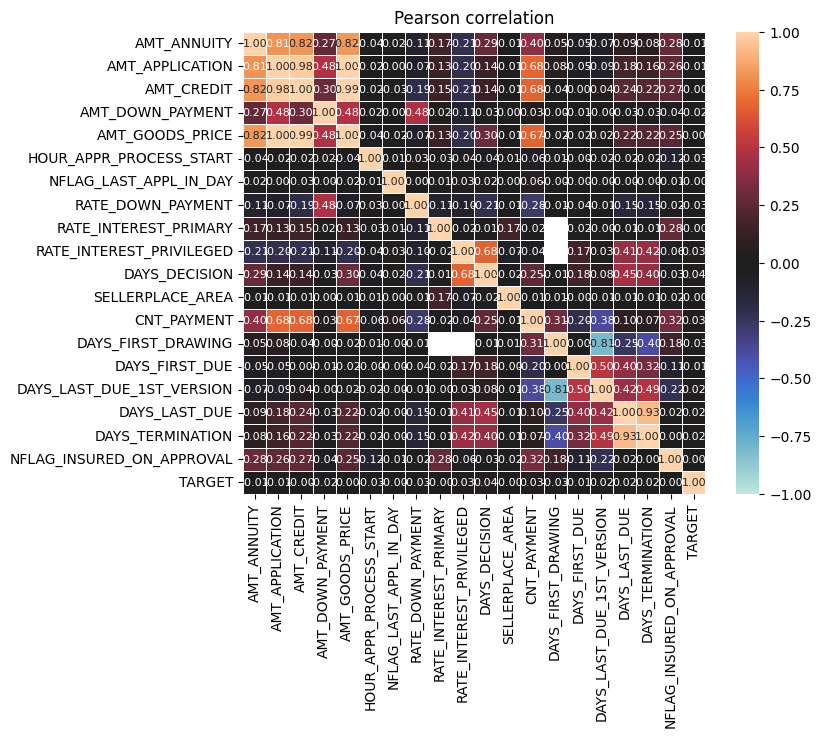

In [45]:
correlation_person = prev_app_df_pd[num_cols][:-1].corr(method='pearson')

draw_heatmap(
    data=correlation_person,
    annot=True,
    annot_kws={'size':8},
    title='Pearson correlation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

In [46]:
num_checker_prev = PhikCorrelationChecker(
    prev_app_df_pd[num_cols], 
    target_col='TARGET')

num_corr_prev = num_checker_prev.get_correlations()


interval columns not set, guessing: ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET']


In [47]:
num_corr_prev.sort_values(by='phik_correlation', ascending=False)

,feature,phik_correlation
12,CNT_PAYMENT,0.056639
10,DAYS_DECISION,0.053695
13,DAYS_FIRST_DRAWING,0.048998
7,RATE_DOWN_PAYMENT,0.039592
5,HOUR_APPR_PROCESS_START,0.038121
9,RATE_INTEREST_PRIVILEGED,0.028204
15,DAYS_LAST_DUE_1ST_VERSION,0.027869
16,DAYS_LAST_DUE,0.027326
17,DAYS_TERMINATION,0.026481
0,AMT_ANNUITY,0.013808


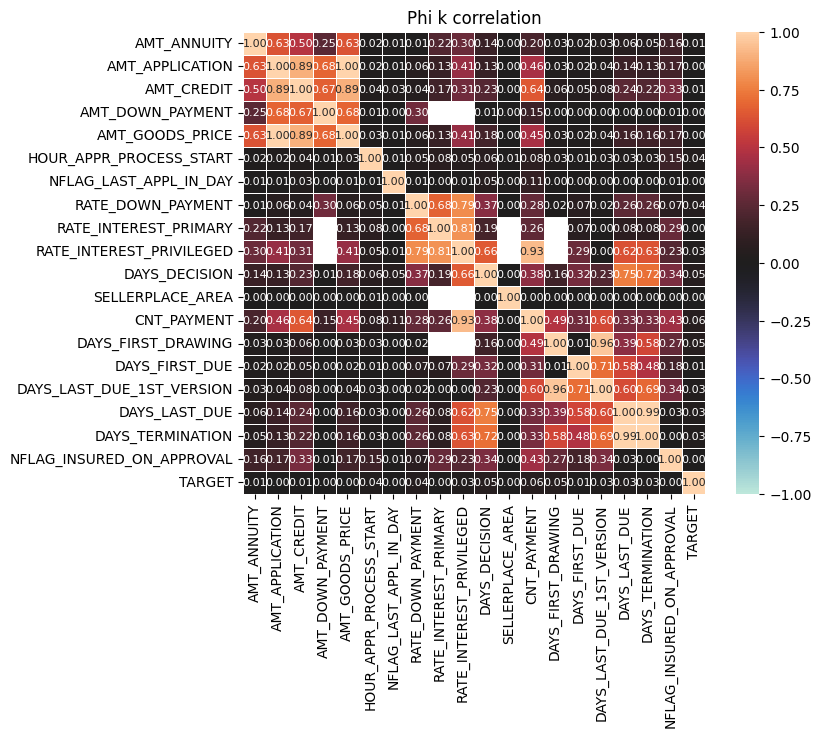

In [48]:
draw_heatmap(
    data=num_checker_prev.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='Phi k correlation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

### Previous Observation: Numerical Feature Correlation (Phi k Heatmap)

This section evaluates the strength of association between numerical features and the target variable using **Phi k correlation**, which captures both linear and non-linear relationships.

### Top Correlated Numerical Features

| Feature               | Phi k Correlation | Insight |
|----------------------|-------------------|---------|
| `CNT_PAYMENT`         | **0.0566**         | Number of planned installments shows the strongest correlation with target. May reflect repayment capacity or loan structure. |
| `DAYS_DECISION`       | **0.0537**         | Timing of previous loan decisions carries predictive signal, possibly linked to recency or credit cycles. |
| `DAYS_FIRST_DRAWING`  | **0.0490**         | First drawing date may indicate loan execution behavior and client reliability. |
| `RATE_DOWN_PAYMENT`   | **0.0396**         | Down payment rate shows moderate correlation, possibly reflecting financial discipline. |
| `HOUR_APPR_PROCESS_START` | **0.0381**     | Time of application has weak but noticeable influence—may reflect behavioral patterns. |

### Low to Minimal Correlation

| Feature               | Phi k Correlation | Insight |
|----------------------|-------------------|---------|
| `RATE_INTEREST_PRIVILEGED` | 0.0282       | Limited coverage, but some signal in privileged interest rates. |
| `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST_DUE`, `DAYS_TERMINATION` | ~0.027 | Loan maturity and termination dates show weak correlation. |
| `AMT_ANNUITY`         | 0.0138             | Weak signal—may be more useful in interaction with other financial features. |
| `DAYS_FIRST_DUE`      | 0.0108             | Minimal standalone predictive power. |


### No Correlation

| Feature               | Phi k Correlation | Insight |
|----------------------|-------------------|---------|
| `AMT_CREDIT`, `AMT_GOODS_PRICE`, `AMT_APPLICATION` | ~0.004 | Surprisingly low correlation—may require feature engineering or normalization. |
| `NFLAG_LAST_APPL_IN_DAY`, `AMT_DOWN_PAYMENT` | ~0.004 | Binary flags and down payment amount show minimal signal. |
| `RATE_INTEREST_PRIMARY`, `SELLERPLACE_AREA`, `NFLAG_INSURED_ON_APPROVAL` | **0.000** | No measurable correlation with target—likely candidates for exclusion. |

### Summary

- Only a few numerical features show meaningful correlation with the target.
- Time-based features (`DAYS_*`) and installment counts (`CNT_PAYMENT`) are the most informative.
- Financial amount features (`AMT_*`) surprisingly show weak correlation—may benefit from transformation or interaction terms.
- Features with zero correlation should be reviewed for exclusion or imputation.



In [ ]:
independed_feature_corr = num_checker_prev.get_feature_feature_correlations()
independed_feature_corr.sort_values(by='phik_correlation', ascending=False).head(10)


,feature_1,feature_2,phik_correlation
21,AMT_APPLICATION,AMT_GOODS_PRICE,1.000000
184,DAYS_LAST_DUE,DAYS_TERMINATION,0.993546
170,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,0.955362
137,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,0.926602
38,AMT_CREDIT,AMT_GOODS_PRICE,0.894729
19,AMT_APPLICATION,AMT_CREDIT,0.894547
124,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,0.806820
113,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIVILEGED,0.789298
150,DAYS_DECISION,DAYS_LAST_DUE,0.750644
151,DAYS_DECISION,DAYS_TERMINATION,0.715125




###  Previous Highly Correlated Numerical Features

This section highlights feature pairs with strong Phi k correlation, indicating potential redundancy or shared information. These relationships should be considered during feature selection or dimensionality reduction.

#### 1. `AMT_GOODS_PRICE`
- Highly correlated with:
  - `AMT_APPLICATION`
  - `AMT_ANNUITY`
  - `AMT_CREDIT`
- These financial features likely reflect similar aspects of loan value or purchase price. Consider consolidating or selecting the most informative one.

#### 2. `DAYS_TERMINATION`
- Strongly correlated with:
  - `DAYS_LAST_DUE`
- These temporal features may represent similar endpoints in the loan lifecycle. One may be sufficient depending on modeling needs.

#### 3. `DAYS_LAST_DUE_1ST_VERSION`
- Closely correlated with:
  - `DAYS_FIRST_DRAWING`
- These features are tied to early loan activity and may overlap in meaning. Evaluate their individual contribution to predictive power.

###  Previous Low Variance Numerical Feature Filtering

Before plotting distributions, I decided to check for **low-variance numerical features**. These features contribute little to data variability and may not provide meaningful insights during visualization or modeling.

By filtering out low-variance columns, I can:
- Reduce the number of plots.
- Focus on more informative features.
- Streamline the EDA process.

In [49]:
def get_low_variance_features(df: pd.DataFrame, threshold: float = 1e-5) -> list:
    """
    Identify numeric columns in a Pandas DataFrame with variance below a threshold.

    Parameters:
    - df: pd.DataFrame
    - threshold: float, minimum variance to keep a feature

    Returns:
    - List of column names with low variance
    """
    numeric_df = df.select_dtypes(include=['number'])
    variances = numeric_df.var()
    low_var_cols = variances[variances < threshold].index.tolist()
    return low_var_cols

In [50]:
low_var_features = get_low_variance_features(prev_app_df_pd[num_cols], threshold=0.01)
print("Low variance features:", len(low_var_features))
low_var_features

Low variance features: 2


['NFLAG_LAST_APPL_IN_DAY', 'RATE_INTEREST_PRIMARY']

## Distribution Analysis of Top 3 Correlated Features

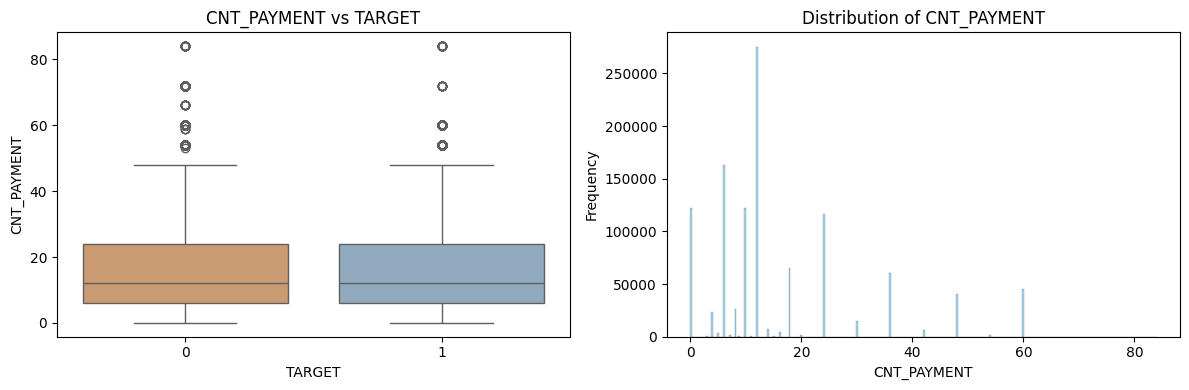

In [51]:
plot_feature_vs_target_and_distribution(
        prev_app_df_pd[num_cols],
        feature='CNT_PAYMENT',
        target='TARGET',
        palette=custom_palette,
    )

### Observations and Findings: `CNT_PAYMENT` vs `TARGET`

#### Boxplot: `CNT_PAYMENT` by `TARGET`

- **Similar Distribution**: Both `TARGET = 0` and `TARGET = 1` groups show similar median values and interquartile ranges.
- **Presence of Outliers**: Both groups contain outliers with unusually high payment counts, suggesting that some loans have extended durations.
- **Interpretation**: The central tendency of `CNT_PAYMENT` does not differ significantly between target classes, but the presence of outliers may carry subtle signals.


#### Histogram: Distribution of `CNT_PAYMENT`

- **Skewed Distribution**: Most values are concentrated at the lower end (e.g., 12–24 payments), with a steep drop-off as the count increases.
- **Common Payment Counts**: Noticeable spikes at specific values (e.g., 12, 24, 36) suggest standardized loan terms.
- **Interpretation**: The distribution reflects typical installment structures, which may be useful for segmenting loan types.

###  Summary

- `CNT_PAYMENT` shows limited separation between target classes but may still be useful in combination with other features.
- The presence of standardized payment counts could support rule-based segmentation or feature binning.
- Outliers and long-duration loans may warrant further investigation for risk modeling.

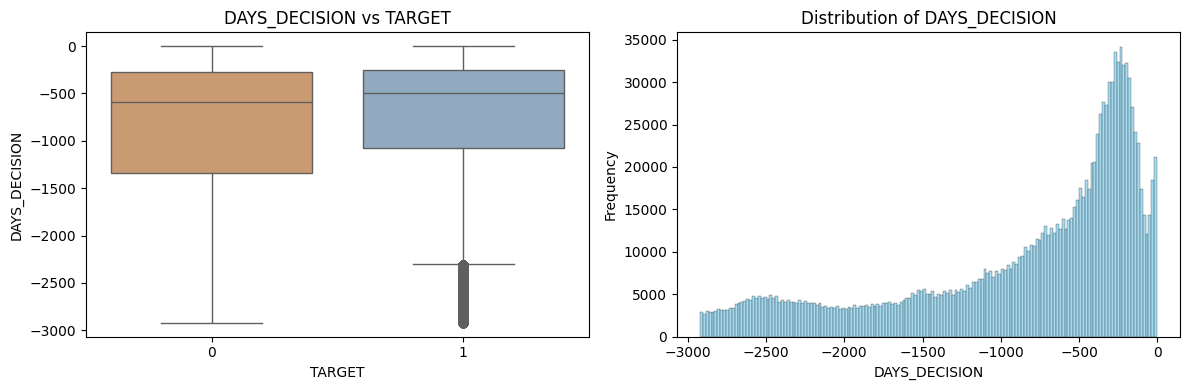

In [52]:
plot_feature_vs_target_and_distribution(
        prev_app_df_pd[num_cols],
        feature='DAYS_DECISION',
        target='TARGET',
        palette=custom_palette,
    )

### Observations and Findings: `DAYS_DECISION` vs `TARGET`


#### Boxplot: `DAYS_DECISION` by `TARGET`

- **Distribution Similarity**: Both `TARGET = 0` and `TARGET = 1` groups show similar median values and interquartile ranges.
- **Outliers**: The `TARGET = 1` group exhibits more extreme negative outliers, suggesting that earlier decisions may be slightly more associated with this outcome.

#### Histogram: Distribution of `DAYS_DECISION`

- **Skewness**: The distribution is **right-skewed**, with most values concentrated around **-500 days**.
- **Frequency Decline**: As the values become more negative, the frequency of decisions gradually decreases.
- **Interpretation**: This indicates that most loan decisions were made within a specific historical window, possibly reflecting operational or policy patterns.

### Summary

- `DAYS_DECISION` does not show strong separation between target classes, but the outlier behavior in `TARGET = 1` may warrant further exploration.
- The temporal concentration around -500 days suggests a consistent decision-making period, which could be useful for time-based feature engineering.
- Overall, `DAYS_DECISION` may offer **limited predictive power alone**, but could be valuable in combination with other time-related features.


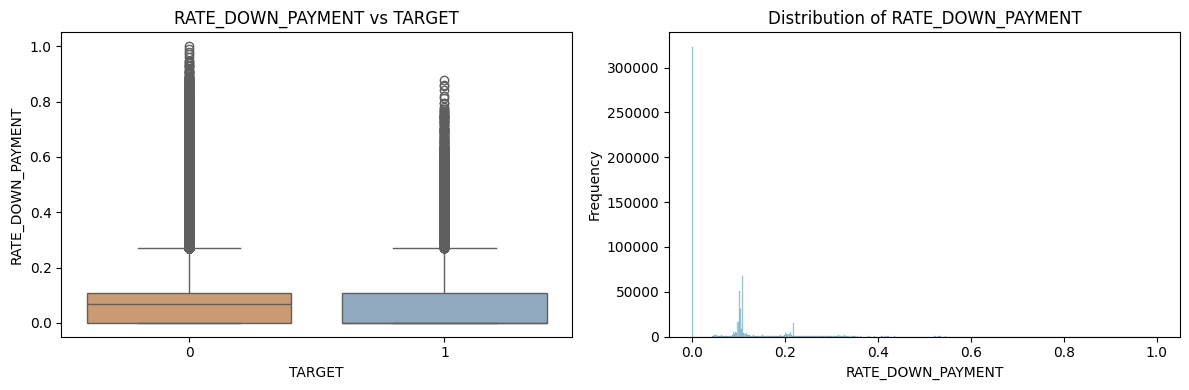

In [55]:
plot_feature_vs_target_and_distribution(
        prev_app_df_pd[num_cols],
        feature='RATE_DOWN_PAYMENT',
        target='TARGET',
        palette=custom_palette,
    )

###  Observations and Findings: `RATE_DOWN_PAYMENT` vs `TARGET`

####  Boxplot: `RATE_DOWN_PAYMENT` by `TARGET`
- **Similar Central Tendency**: Both `TARGET = 0` and `TARGET = 1` groups have medians close to zero, indicating that most applicants make minimal down payments.
- **High Variability**: A wide range of values and numerous outliers suggest that some applicants make significantly higher down payments.
- **Interpretation**: The distribution does not show strong separation between target classes, but the presence of outliers could be informative for risk assessment.

####  Histogram: Distribution of `RATE_DOWN_PAYMENT`

- **Right-Skewed Distribution**: Most values are clustered near zero, with a long tail extending toward higher rates.
- **Spikes at Specific Values**: Indicates that certain down payment rates are more common, possibly due to standardized financial products or policies.
- **Interpretation**: The skewness and concentration near zero reflect typical borrower behavior, while the tail may highlight high-risk or premium loan segments.

###  Summary
- `RATE_DOWN_PAYMENT` is generally low across the board, but its outliers and distribution shape may still offer predictive value.
- The variable could be useful when combined with other financial indicators to model creditworthiness or loan risk.
- Further segmentation or binning might enhance its utility in machine learning models.





#  Final Summary of Previous Application Analysis

##  Dataset Overview

- **Total Records**: 1,670,214  
- **Total Features**: 37  
- **Data Types**:
  - `float64`: Financial fields (e.g., `AMT_APPLICATION`, `AMT_CREDIT`)
  - `int`: Date and count fields (e.g., `DAYS_DECISION`, `CNT_PAYMENT`)
  - `object`: Categorical fields (e.g., `NAME_CONTRACT_TYPE`, `PRODUCT_COMBINATION`)
- **Missing Data**:
  - ~50% of columns contain missing values
  - `RATE_INTEREST_PRIMARY` & `RATE_INTEREST_PRIVILEGED`: ~99.6% missing
  - `AMT_DOWN_PAYMENT`, `DAYS_FIRST_DRAWING`, etc.: ~40–50% missing
- **Duplicates**: None


##  Linkage with Training Set

- **Training Applicants**: 307,511  
- **With Previous Applications**: 291,057  
- **New Applicants (No History)**: 16,454  
- **Relationship**: One-to-many via `SK_ID_CURR` ↔ `SK_ID_PREV`


##  Categorical Feature Highlights

### NAME_CONTRACT_TYPE
- Dominant: `'Cash loans'` → preference for direct borrowing

### NAME_CONTRACT_STATUS
- `'Approved'`: 62% of applications  
- `'Refused'`: Highest default rate (12%)  
- `'Canceled'`: Moderate risk  
- `'Unused offer'`: Minimal impact

### PRODUCT_COMBINATION
- `'Cash'` and `'POS household with interest'` dominate  
- Cross-sell products show strong uptake  
- Interest-free POS products are less common

### Other Highlights
- Frequent placeholders: `'XNA'`, `'XAP'`  
- `'Repeat clients'` dominate → may reflect trust or risk tolerance  
- `'Wednesday'` most common application day

##  Numerical Feature Insights

### Strong Feature Correlations
| Feature Pair | Correlation |
|--------------|-------------|
| `AMT_GOODS_PRICE` ↔ `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_ANNUITY` | High |
| `DAYS_TERMINATION` ↔ `DAYS_LAST_DUE` | High |
| `DAYS_FIRST_DRAWING` ↔ `DAYS_LAST_DUE_1ST_VERSION` | High |

### Top Features by Phi k Correlation with Target
| Feature               | Phi k Correlation | Insight |
|----------------------|-------------------|---------|
| `CNT_PAYMENT`         | 0.0566            | Installment count reflects loan structure and repayment behavior |
| `DAYS_DECISION`       | 0.0537            | Timing may reflect credit cycles |
| `DAYS_FIRST_DRAWING`  | 0.0490            | Execution behavior indicator |
| `RATE_DOWN_PAYMENT`   | 0.0396            | Financial discipline proxy |
| `HOUR_APPR_PROCESS_START` | 0.0381        | Weak behavioral signal

### Low-Correlation Features
- `AMT_*` fields: Surprisingly low correlation (~0.004)  
- `RATE_INTEREST_*`, `SELLERPLACE_AREA`, `NFLAG_*`: No measurable signal


##  Highly Correlated Categorical Pairs (Phi k > 0.85)

| Feature 1             | Feature 2             | Phi k |
|-----------------------|-----------------------|-------|
| `NAME_PRODUCT_TYPE`   | `PRODUCT_COMBINATION` | 0.948 |
| `NAME_GOODS_CATEGORY` | `NAME_SELLER_INDUSTRY`| 0.947 |
| `NAME_CONTRACT_TYPE`  | `PRODUCT_COMBINATION` | 0.931 |

>  Consider dropping or combining highly correlated features to reduce redundancy

---

##  Modeling Recommendations

- Prioritize top categorical features: `NAME_CONTRACT_STATUS`, `PRODUCT_COMBINATION`, `CODE_REJECT_REASON`
- Engineer features from:
  - Loan timing (`DAYS_*`)
  - Installment structure (`CNT_PAYMENT`)
  - Product segmentation (`PRODUCT_COMBINATION`)
- Handle missing values via imputation or exclusion
- Drop low-signal features unless useful in interaction terms
- Consider binning standardized values (e.g., 12, 24, 36 payments)

## Installments_payments.csv 

The repayment history of each of the loan that the applicant had with Home Credit Group


## Installmens Data Loading  and Preprocessing

In [56]:
inst_pay_df= pl.read_csv("../data/installments_payments.csv")
inst_pay_df = reduce_memory_usage_pl(inst_pay_df)


Size before reduction: 830.48 MB
Initial data types: Counter({Float64: 5, Int64: 3})
Size after reduction: 389.32 MB
Final data types: Counter({Float32: 5, Int32: 2, Int16: 1})


## Descriptive Statistics

In [57]:
inst_pay_df.shape

(13605401, 8)

## Installmens Missing Value Counts

In [ ]:
missing_data = get_missing_percentages(inst_pay_df)
missing_data

feature,missing_percentage
str,f64
"""SK_ID_PREV""",0.0
"""SK_ID_CURR""",0.0
"""NUM_INSTALMENT_VERSION""",0.0
"""NUM_INSTALMENT_NUMBER""",0.0
"""DAYS_INSTALMENT""",0.0
"""DAYS_ENTRY_PAYMENT""",0.021352
"""AMT_INSTALMENT""",0.0
"""AMT_PAYMENT""",0.021352


## Instalmens Coverage Check

In [59]:
inatallments_app_ids = inst_pay_df.select(pl.col('SK_ID_CURR').unique())
app_clients_count = application_train.select(pl.col('SK_ID_CURR').unique())

In [60]:
print('Count of Current application in train', total_applicants)     

count_application_inst = (
    application_train.join(inatallments_app_ids, on='SK_ID_CURR', how='inner')
)
print('Count of current applicant who already got loan from Home credit ',len(count_application_inst))
print('New applicant in train ', total_applicants - len(count_application_inst))

duplicated = prev_app_df.filter(prev_app_df.is_duplicated())
print('Count of Duplicate count',len(duplicated))

Count of Current application in train 307511
Count of current applicant who already got loan from Home credit  291643
New applicant in train  15868
Count of Duplicate count 0


In [62]:
ids_list = count_application_inst['SK_ID_CURR'].to_list()
clean_inst_app = inst_pay_df.filter(pl.col('SK_ID_CURR').is_in(ids_list))


In [63]:
insta_app_train_merged = clean_inst_app.join(count_application_inst.select(['SK_ID_CURR', 'TARGET']), on='SK_ID_CURR', how='left')

In [64]:
insta_app_df_pd =  insta_app_train_merged.to_pandas()

In [ ]:
insta_app_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11591592 entries, 0 to 11591591
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int32  
 1   SK_ID_CURR              int32  
 2   NUM_INSTALMENT_VERSION  float32
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         float32
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
 8   TARGET                  int64  
dtypes: float32(5), int16(1), int32(2), int64(1)
memory usage: 420.1 MB


In [ ]:
insta_app_df_pd.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
count,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.158901e+07,1.159159e+07,1.158901e+07,1.159159e+07
mean,1.903552e+06,2.785345e+05,8.509618e-01,1.873027e+01,-1.041082e+03,-1.049898e+03,1.691790e+04,1.707693e+04,7.593892e-02
std,5.362314e+05,1.026410e+05,1.002910e+00,2.649067e+01,7.994780e+02,7.990790e+02,5.033127e+04,5.445628e+04,2.649004e-01
min,1.000001e+06,1.000020e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434524e+06,1.897190e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.663000e+03,4.203675e+03,3.378375e+03,0.000000e+00
50%,1.896635e+06,2.788280e+05,1.000000e+00,8.000000e+00,-8.200000e+02,-8.290000e+02,8.787645e+03,8.095410e+03,0.000000e+00
75%,2.369256e+06,3.675090e+05,1.000000e+00,1.900000e+01,-3.590000e+02,-3.680000e+02,1.655559e+04,1.593193e+04,0.000000e+00
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06,1.000000e+00


### Statistical Observations: Loan Installment Dataset

This dataset contains over 13.6 million records related to loan installment payments. Below is a breakdown of key variables and their statistical characteristics.


#### General Overview

| Metric             | Total Records     | Missing Values |
|--------------------|------------------|----------------|
| All Variables      | 13,605,401        | 0 – 2,905      |
| `DAYS_ENTRY_PAYMENT` & `AMT_PAYMENT` | 13,602,496      | 2,905          |


#### Variable Insights

- **`SK_ID_PREV`  `SK_ID_CURR`**
  - Unique identifiers for previous and current loans.
  - No missing values.
  - Wide range of IDs, suggesting diverse loan histories.

- **`NUM_INSTALMENT_VERSION`**
  - Mean: ~0.86, Std Dev: ~1.04
  - Mostly 0 or 1, but max value reaches 178, indicating multiple versions for some loans.

- **`NUM_INSTALMENT_NUMBER`**
  - Median: 8, Range: 1 to 277
  - Indicates the number of scheduled installments per loan.
  - Long tail suggests some loans have extended payment plans.

- **`DAYS_INSTALMENT`**
  - Negative values represent days before the reference date.
  - Median: -818 days (~2.2 years before reference).
  - Range: -2922 to -1 days.

- **`DAYS_ENTRY_PAYMENT`**
  - Slightly more negative than `DAYS_INSTALMENT`, indicating payments often made before due date.
  - Missing in 2,905 cases.

- **`AMT_INSTALMENT`**
  - Median: ~8,884, Mean: ~17,051
  - Highly skewed with a max of 3.77 million.
  - Indicates large variability in installment amounts.

- **`AMT_PAYMENT`**
  - Slightly higher mean than `AMT_INSTALMENT`, suggesting some overpayments.
  - Missing in 2,905 cases.
  - Median: ~8,125, Max: 3.77 million


###  Key Takeaways

- Most loans have relatively short installment plans (median 8 payments), but some extend significantly.
- Payment behavior shows early payments are common.
- High variability in installment and payment amounts suggests a mix of small consumer loans and large financial products.
- Missing values in `DAYS_ENTRY_PAYMENT` and `AMT_PAYMENT` may require imputation or exclusion depending on modeling goals.


## Correlation Between Features and Target

Next, I examine how each feature is correlated with the `TARGET` variable. This helps identify which categories are strong indicators of loan repayment behavior and can be valuable for predictive modeling.

In [65]:
checker_inta = PhikCorrelationChecker(
    insta_app_df_pd.drop(columns=['SK_ID_CURR','SK_ID_PREV']) ,
    target_col='TARGET')

corr_target = checker_inta.get_correlations()


interval columns not set, guessing: ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'TARGET']


In [66]:
corr_target.sort_values(by='phik_correlation', ascending=False )

,feature,phik_correlation
3,DAYS_ENTRY_PAYMENT,0.047231
2,DAYS_INSTALMENT,0.046815
1,NUM_INSTALMENT_NUMBER,0.022993
4,AMT_INSTALMENT,0.004125
5,AMT_PAYMENT,0.003084
0,NUM_INSTALMENT_VERSION,0.002198


### 🔍 Observation

No individual feature currently shows a strong correlation with the target variable. However, by aggregating the data, we may uncover more meaningful relationships.

In [ ]:
independed_feature_corr = checker_inta.get_feature_feature_correlations()
independed_feature_corr.sort_values(by='phik_correlation', ascending=False )

,feature_1,feature_2,phik_correlation
18,AMT_INSTALMENT,AMT_PAYMENT,0.998818
11,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,0.906253
6,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,0.263616
7,NUM_INSTALMENT_NUMBER,DAYS_ENTRY_PAYMENT,0.188115
13,DAYS_INSTALMENT,AMT_PAYMENT,0.062626
12,DAYS_INSTALMENT,AMT_INSTALMENT,0.056712
17,DAYS_ENTRY_PAYMENT,TARGET,0.047231
14,DAYS_INSTALMENT,TARGET,0.046815
16,DAYS_ENTRY_PAYMENT,AMT_PAYMENT,0.045116
15,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,0.040992


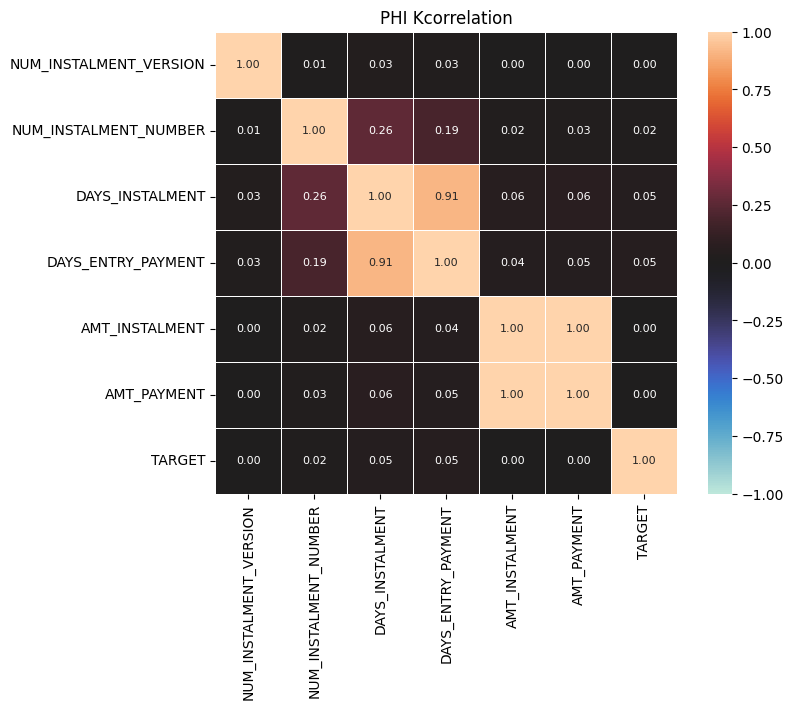

In [ ]:

draw_heatmap(
    data=checker_inta.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='PHI Kcorrelation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

### Observation 

1. DAYS_ENTRY_PAYMENT and AMT_PAYMENT are highly correlated with DAYS_INSTALMENT and AMT_INSTALMENT respectively.
2. The features as to when the installment was due to be paid vs when it was paid and also the amount that was due vs the amount that was paid these features will be useful for creating new sets of completely uncorrelated features.



## Distribution Analysis of Installments feature

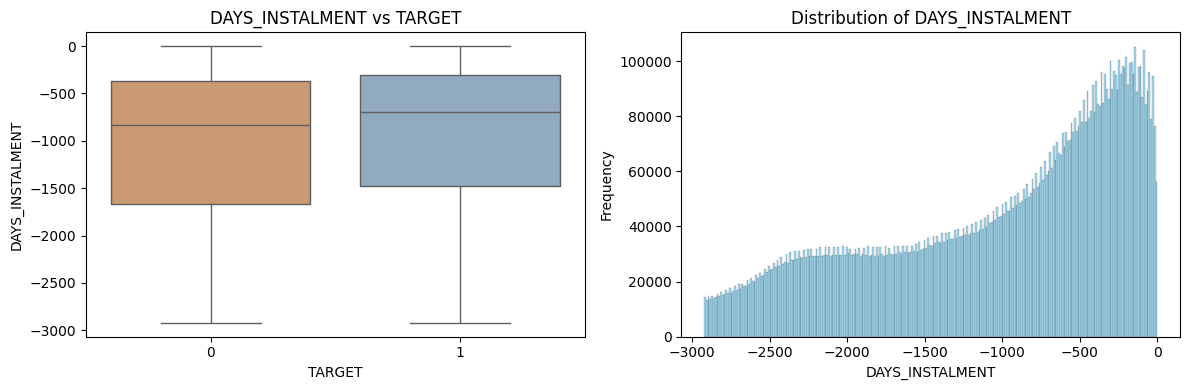

In [67]:
plot_feature_vs_target_and_distribution(
        insta_app_df_pd,
        feature='DAYS_INSTALMENT',
        target='TARGET',
        palette=custom_palette,
    )

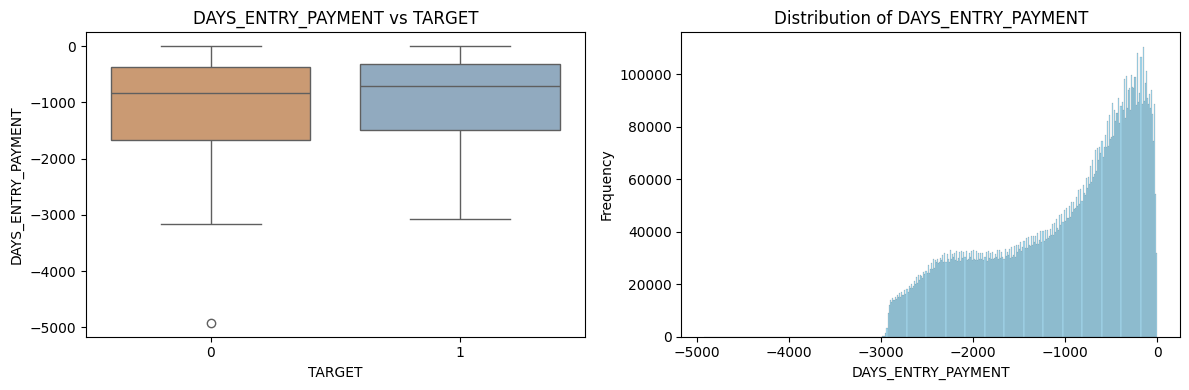

In [68]:
plot_feature_vs_target_and_distribution(
        insta_app_df_pd,
        feature='DAYS_ENTRY_PAYMENT',
        target='TARGET',
        palette=custom_palette,
    )

In [69]:
inspay_merged = insta_app_df_pd.groupby('SK_ID_PREV').mean()
inspay_merged.shape

(853344, 8)

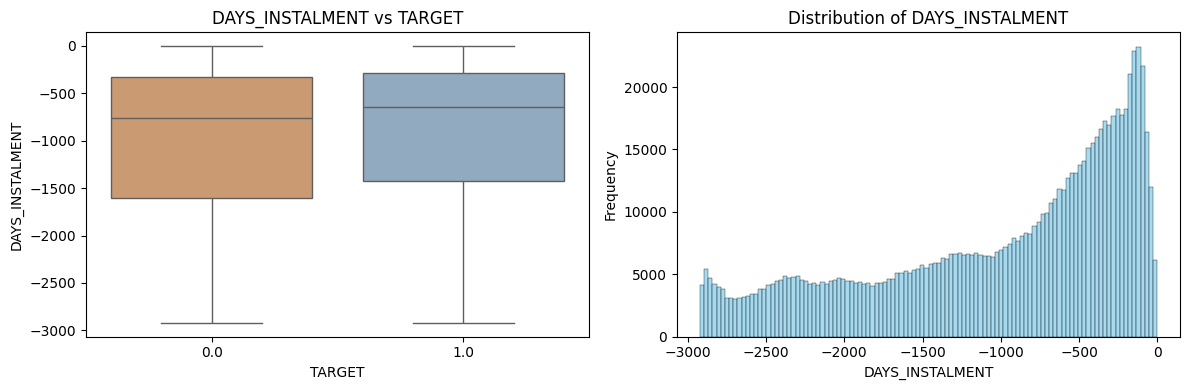

In [70]:
plot_feature_vs_target_and_distribution(
        inspay_merged,
        feature='DAYS_INSTALMENT',
        target='TARGET',
        palette=custom_palette,
    )

### Observations & Findings

#### Feature: `DAYS_INSTALMENT`
- Represents the scheduled date for an installment payment (in days relative to a reference point).
- Distribution is skewed toward more recent dates (closer to 0), indicating a concentration of recent loan activity.
- Boxplot analysis shows similar distributions across `TARGET` classes, suggesting limited predictive power in isolation.

#### Feature: `DAYS_ENTRY_PAYMENT`
- Indicates the actual date when the payment was made.
- Highly correlated with `DAYS_INSTALMENT`, implying that most payments are made close to their scheduled dates.
- Alone, it does not strongly differentiate between defaulters and non-defaulters.

#### Feature: `AMT_PAYMENT`
- Reflects the actual amount paid by the borrower.
- Strongly correlated with `AMT_INSTALMENT`, meaning most borrowers pay the expected amount.
- Raw values show little separation between target classes, but deviations from expected amounts may carry predictive value.


###  Key Insight

While these features individually show strong internal correlations, they lack direct predictive strength for the target variable. However, feature engineering can unlock behavioral signals:

- **Payment Delay**: `DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT`  
  → Captures whether payments were made early, on time, or late.

- **Payment Deviation**: `AMT_PAYMENT - AMT_INSTALMENT`  
  → Reveals underpayments, overpayments, or exact matches.

These derived features are likely to be less correlated with existing variables and may improve model performance by capturing borrower behavior more effectively.

#  Final Summary of Installment Payments Analysis

##  Installment Coverage Check

- **Total Current Applications in Training Set**: 307,511  
- **Applicants with Previous Loans from Home Credit**: 291,643  
- **New Applicants (No Prior Loans)**: 15,868  
- **Duplicate Records**: 0


## Statistical Overview: Installment Dataset

| Metric                                | Total Records | Missing Values |
|--------------------------------------|---------------|----------------|
| All Variables                         | 13,605,401    | 0 – 2,905      |
| `DAYS_ENTRY_PAYMENT`, `AMT_PAYMENT`   | 13,602,496    | 2,905          |


##  Variable Insights

- **`SK_ID_PREV` & `SK_ID_CURR`**
  - Unique loan and client identifiers
  - No missing values
  - Wide range of IDs → diverse loan histories

- **`NUM_INSTALMENT_VERSION`**
  - Mean ≈ 0.86, Std Dev ≈ 1.04  
  - Mostly 0 or 1; max = 178 → multiple versions for some loans

- **`NUM_INSTALMENT_NUMBER`**
  - Median = 8, Range = 1 to 277  
  - Long tail → some loans have extended payment plans

- **`DAYS_INSTALMENT`**
  - Median = –818 days (~2.2 years before reference)  
  - Range = –2922 to –1  
  - Negative values → scheduled payment dates before reference

- **`DAYS_ENTRY_PAYMENT`**
  - Slightly more negative than `DAYS_INSTALMENT`  
  - Indicates early payments are common  
  - Missing in 2,905 rows

- **`AMT_INSTALMENT`**
  - Median ≈ 8,884; Mean ≈ 17,051  
  - Max = 3.77M → highly skewed distribution

- **`AMT_PAYMENT`**
  - Median ≈ 8,125; Mean slightly higher than `AMT_INSTALMENT`  
  - Max = 3.77M  
  - Missing in 2,905 rows → may require imputation


##  Key Takeaways

- Most loans have short installment plans (median ≈ 8 payments)
- Early payments are common across borrowers
- High variability in payment amounts → mix of small and large loans
- `DAYS_ENTRY_PAYMENT` and `AMT_PAYMENT` are highly correlated with their scheduled counterparts



##  Observations & Findings

### Feature: `DAYS_INSTALMENT`
- Represents scheduled payment date  
- Skewed toward recent activity  
- Similar distribution across `TARGET` classes → limited standalone predictive power

### Feature: `DAYS_ENTRY_PAYMENT`
- Actual payment date  
- Strong correlation with `DAYS_INSTALMENT`  
- Does not strongly differentiate defaulters vs non-defaulters

### Feature: `AMT_PAYMENT`
- Actual amount paid  
- Strong correlation with `AMT_INSTALMENT`  
- Raw values show little separation between target classes


##  Key Insight: Feature Engineering Potential

While raw features show limited predictive power, derived behavioral features may unlock deeper signals:

- **Payment Delay**:  
  `DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT`  
  → Early, on-time, or late payments

- **Payment Deviation**:  
  `AMT_PAYMENT - AMT_INSTALMENT`  
  → Underpayments, overpayments, or exact matches

> These engineered features are likely to be less correlated with existing variables and may improve model performance by capturing borrower behavior more effectively.

## POS_CASH_balance.csv EDA

The table contains the Monthly Balance Snapshots of previous Point of Sales and Cash Loans that the applicant had with Home Credit Group.


##  POS_CASH Data Loading and Raduce Memory

In [71]:
pos_cash= pl.read_csv("../data/POS_CASH_balance.csv")
pos_cash = reduce_memory_usage_pl(pos_cash)


Size before reduction: 595.96 MB
Initial data types: Counter({Int64: 5, Float64: 2, String: 1})
Size after reduction: 240.84 MB
Final data types: Counter({Int32: 2, Float32: 2, Int16: 2, Int8: 1, Categorical(ordering='physical'): 1})


##  POS_CASH Dataset: Statistical Summary

In [72]:
pos_cash.describe()

statistic,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
str,f64,f64,f64,f64,f64,str,f64,f64
"""count""",1.0001358e7,1.0001358e7,1.0001358e7,9.975287e6,9.975271e6,"""10001358""",1.0001358e7,1.0001358e7
"""null_count""",0.0,0.0,0.0,26071.0,26087.0,"""0""",0.0,0.0
"""mean""",1.9032e6,278403.863306,-35.012588,17.089651,10.48384,null,11.606928,0.654468
"""std""",535846.530722,102763.74509,26.06657,11.995056,11.109057,null,132.714043,32.762491
"""min""",1.000001e6,100001.0,-96.0,1.0,0.0,null,0.0,0.0
"""25%""",1.434405e6,189550.0,-54.0,10.0,3.0,null,0.0,0.0
"""50%""",1.896565e6,278654.0,-28.0,12.0,7.0,null,0.0,0.0
"""75%""",2.368963e6,367429.0,-13.0,24.0,14.0,null,0.0,0.0
"""max""",2.843499e6,456255.0,-1.0,92.0,85.0,null,4231.0,3595.0


### Observation: Credit Balance Statistics

This dataset contains over 10 million records related to monthly credit balances. Below is a summary of key features and their statistical characteristics.

#### Feature Insights

- **`MONTHS_BALANCE`**
  - Mean: -35.01, Min: -96, Max: -1
  - Indicates historical monthly snapshots, with more recent records closer to 0.

- **`CNT_INSTALMENT` & `CNT_INSTALMENT_FUTURE`**
  - Median values: 12 and 7 respectively
  - Max values: 92 and 85
  - Reflect the number of completed and remaining installments; useful for tracking loan progress.

- **`SK_DPD` & `SK_DPD_DEF`**
  - Represent days past due and days past due with default.
  - Most values are 0, but max values reach 4,231 and 35,922 respectively.
  - High skewness suggests most customers are punctual, but a small subset has extreme delinquency.


### Key Takeaways

- The dataset is nearly complete, with minimal missing values in installment counts.
- Most customers have short-to-medium installment plans and low delinquency.
- `SK_DPD_DEF` shows extreme outliers, which may be strong indicators of default risk.
- `MONTHS_BALANCE` can be used to track credit behavior over time and align with other time-based features.



In [73]:
pos_cash_app_ids = pos_cash.select(pl.col('SK_ID_CURR').unique())
app_train_with_pos = application_train.select(pl.col('SK_ID_CURR').unique())
print('Count of Current application in train', total_applicants)
appl_train_pos = (
    application_train.join(pos_cash_app_ids, on='SK_ID_CURR', how='inner')
)
print('Count of current applicant whose POS info we have ', len(appl_train_pos))
print('New applicant in train ', total_applicants - len(appl_train_pos))


duplicated =pos_cash.filter(pos_cash.is_duplicated())
duplicated.shape[0]

Count of Current application in train 307511
Count of current applicant whose POS info we have  289444
New applicant in train  18067


0

##  Missing Value Counts

Missing values in a Dataset will affect model performances, to avoid that need to handle this problem for that I have various method , important method is Imputer for that first i need to check missing values details in this tables.

In [ ]:
get_missing_percentages(pos_cash)

feature,missing_percentage
str,f64
"""SK_ID_PREV""",0.0
"""SK_ID_CURR""",0.0
"""MONTHS_BALANCE""",0.0
"""CNT_INSTALMENT""",0.260675
"""CNT_INSTALMENT_FUTURE""",0.260835
"""NAME_CONTRACT_STATUS""",0.0
"""SK_DPD""",0.0
"""SK_DPD_DEF""",0.0


### Missing Data Analysis

This section outlines the percentage of missing values across key features in the dataset. Understanding missingness is crucial for data cleaning, feature engineering, and modeling decisions.

###  Observations

-  Most features are fully populated, ensuring strong data integrity for ID tracking, contract status, and delinquency metrics.
- `CNT_INSTALMENT` and `CNT_INSTALMENT_FUTURE` show significant missingness (~26%), likely due to early loan closures, system limitations, or incomplete reporting.

In [77]:
pos_cash_app_train_merged  =pos_cash.join(appl_train_pos.select(['SK_ID_CURR', 'TARGET']), on='SK_ID_CURR', how='left')
pos_cash_app_train_merged.shape

(10001358, 9)

In [75]:
pos_cash_app_pd =  pos_cash_app_train_merged.to_pandas()
categorical_pos = pos_cash_app_pd.select_dtypes(include='category').columns.to_list()
categorical_pos


['NAME_CONTRACT_STATUS']

In [89]:
def summarize_feature_target(df: pd.DataFrame, feature: str, target: str) -> pd.DataFrame:
    """
    Summarize how a categorical feature relates to the target variable.

    Returns:
    - DataFrame with columns: [feature, TARGET, total, Average]
    """
    
    target_0_counts = df[df[target] == 0][feature].value_counts().rename("TARGET")
    total_counts = df[feature].value_counts().rename("total")
    summary = pd.concat([target_0_counts, total_counts], axis=1).fillna(0)
    summary["Average"] = (summary["TARGET"] / summary["total"]) * 100
    summary = summary.reset_index().rename(columns={"index": feature})

    return summary[[feature, "TARGET", "total", "Average"]]

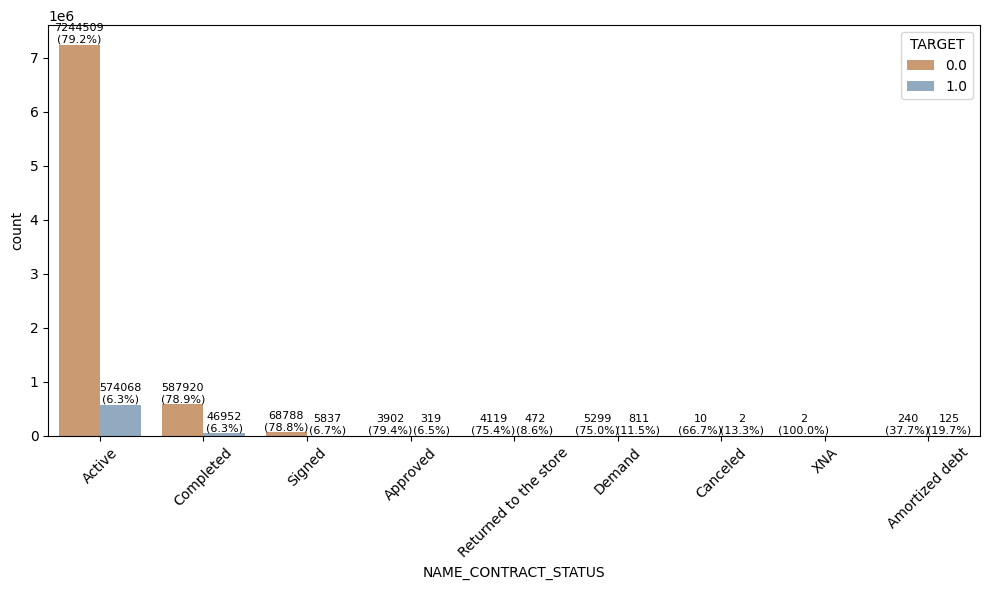

In [76]:
barplot_feature_vs_target(
    pos_cash_app_pd,
    'NAME_CONTRACT_STATUS',
    'TARGET',
    palette=custom_palette
)

In [ ]:
summary_df = summarize_feature_target(pos_cash_app_pd, 'NAME_CONTRACT_STATUS', "TARGET")
print(summary_df)

    NAME_CONTRACT_STATUS   TARGET    total     Average
0                 Active  7244509  9151119   79.165280
1              Completed   587920   744883   78.927832
2                 Signed    68788    87260   78.831080
3                 Demand     5299     7065   75.003539
4  Returned to the store     4119     5461   75.425746
5               Approved     3902     4917   79.357332
6         Amortized debt      240      636   37.735849
7               Canceled       10       15   66.666667
8                    XNA        2        2  100.000000


### Contract Status vs. Target Variable

This bar chart visualizes the distribution of contract statuses (`NAME_CONTRACT_STATUS`) in relation to a binary target variable (`TARGET`). Each bar is split by `TARGET` values (0.0 and 1.0), allowing us to assess how contract status correlates with the outcome.

###  Observations

- **Dominance of "Active" Contracts**  
  - The "Active" status accounts for the vast majority of entries (≈79.2%), with most associated with `TARGET = 0.0`.  
  - This suggests that active contracts are generally not linked to the target event (e.g., default or churn).

- **"Completed" Contracts Show Higher Risk**  
  - Although only 6.3% of the data, "Completed" contracts have a noticeably higher proportion of `TARGET = 1.0`.  
  - This may indicate that customers who complete their contracts are more likely to trigger the target condition afterward.

- **"Signed" Contracts Are Stable**  
  - Representing 5.1% of the data, "Signed" contracts are mostly associated with `TARGET = 0.0`, implying low risk.

- **Low-Frequency Statuses**  
  - Categories like "Approved", "Returned to the store", "Demand", "Canceled", "N/A", and "Amortized debt" each contribute less than 1% of the total.  
  - These have minimal impact on overall distribution but may hold niche insights.

###  Key Findings

- The target variable is highly imbalanced, with `TARGET = 1.0` being rare across all statuses.
- "Completed" contracts may warrant closer inspection for post-contract risk modeling.
- "Active" contracts dominate the dataset, which could skew model training if not properly balanced.


## Correlation Between Features and Target

In [78]:

clean_pos_cash_df = pos_cash_app_pd.drop(columns=['SK_ID_PREV','SK_ID_CURR'])

In [ ]:
checker_pos = PhikCorrelationChecker(
    clean_pos_cash_df,
    target_col='TARGET')
result = checker_pos.get_correlations()

interval columns not set, guessing: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'TARGET']


In [80]:
sorted_corr = result.sort_values(by='phik_correlation', ascending=False)
sorted_corr

,feature,phik_correlation
2,CNT_INSTALMENT_FUTURE,0.033068
1,CNT_INSTALMENT,0.031891
0,MONTHS_BALANCE,0.027383
4,SK_DPD,0.012773
5,SK_DPD_DEF,0.010633
3,NAME_CONTRACT_STATUS,0.009566


## Phik Correlation Analysis

Phik correlation is a robust measure of association that captures both linear and non-linear relationships between variables. The following table ranks features by their correlation strength with the target variable:

### Observations

- **Low Overall Correlation**  
  All features show weak correlation with the target variable (Phik < 0.05), suggesting no strong individual predictors in isolation.

- **Top Contributors**  
  - `CNT_INSTALMENT_FUTURE` and `CNT_INSTALMENT` rank highest, indicating that installment-related features may carry modest predictive power.
  - `MONTHS_BALANCE` also shows some signal, possibly reflecting temporal patterns in credit behavior.

- **Delinquency Metrics (`SK_DPD`, `SK_DPD_DEF`)**  
  Despite their intuitive relevance, these features show surprisingly low correlation, possibly due to skewed distributions or sparsity in non-zero values.

- **Contract Status**  
  `NAME_CONTRACT_STATUS` has the weakest correlation, implying limited direct influence on the target outcome.





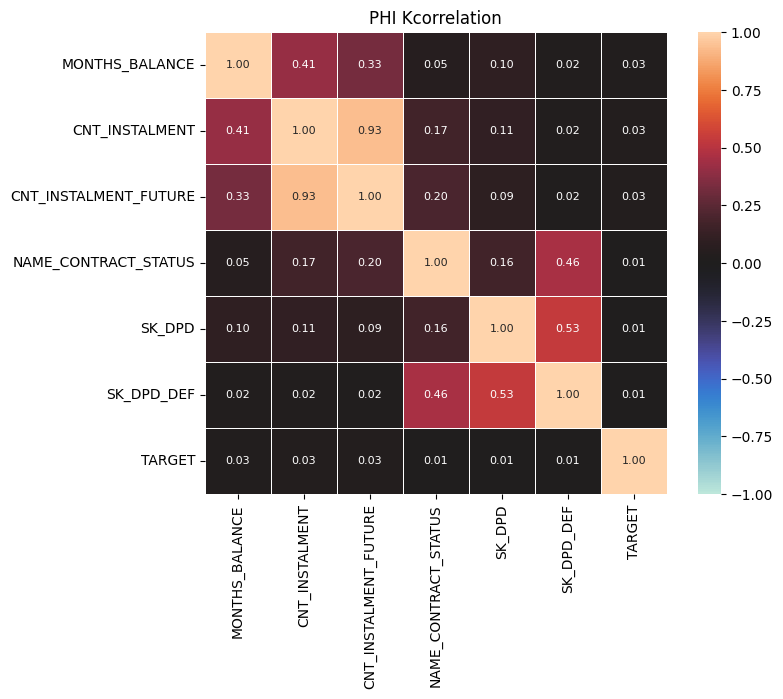

In [ ]:

draw_heatmap(
    data=checker_pos.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='PHI Kcorrelation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

In [ ]:
checker_pos.get_feature_feature_correlations().sort_values('phik_correlation',ascending=False)

,feature_1,feature_2,phik_correlation
6,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,0.934106
18,SK_DPD,SK_DPD_DEF,0.533728
16,NAME_CONTRACT_STATUS,SK_DPD_DEF,0.458083
0,MONTHS_BALANCE,CNT_INSTALMENT,0.412091
1,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,0.326000
11,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,0.199122
7,CNT_INSTALMENT,NAME_CONTRACT_STATUS,0.166489
15,NAME_CONTRACT_STATUS,SK_DPD,0.164932
8,CNT_INSTALMENT,SK_DPD,0.105267
3,MONTHS_BALANCE,SK_DPD,0.098397


####  Observation

- `CNT_INSTALMENT_FUTURE` and `CNT_INSTALMENT` exhibit a strong internal correlation, indicating they capture similar aspects of installment behavior—likely total vs. remaining payments.
- None of the features show significant correlation with the target variable, as all Phik correlation values are below 0.05.
- This suggests that individual features may not be strong predictors of the target outcome on their own and that more complex interactions or engineered features may be necessary for effective modeling.


#  Final Summary of POS_CASH Balance Analysis

##  Dataset Coverage

- **Total Current Applications in Training Set**: 307,511  
- **Applicants with POS_CASH Info**: 289,444  
- **New Applicants (No POS History)**: 18,067  
- **Total Records in POS_CASH Dataset**: >10 million  
- **Duplicate Records**: None


## Feature Insights

### `MONTHS_BALANCE`
- Mean: –35.01  
- Range: –96 to –1  
- Represents monthly snapshots of credit behavior  
- More recent records are closer to 0

### `CNT_INSTALMENT` & `CNT_INSTALMENT_FUTURE`
- Median values: 12 and 7 respectively  
- Max values: 92 and 85  
- Reflect completed vs. remaining installments  
- Useful for tracking loan progress

### `SK_DPD` & `SK_DPD_DEF`
- Represent days past due and days past due with default  
- Most values are 0  
- Max values: 4,231 and 35,922 → extreme outliers  
- High skewness → most customers are punctual, but a few show severe delinquency


## Missing Data Analysis

| Feature                  | Missing Rate |
|--------------------------|---------------|
| `CNT_INSTALMENT`         | ~26%          |
| `CNT_INSTALMENT_FUTURE`  | ~26%          |
| Other Features           | Minimal       |

> Missingness likely due to early loan closures or incomplete reporting


## Contract Status vs Target (`NAME_CONTRACT_STATUS`)

### Key Observations

- **"Active" Contracts**  
  - ≈79.2% of entries  
  - Mostly associated with `TARGET = 0.0` → low risk

- **"Completed" Contracts**  
  - ≈6.3% of entries  
  - Higher proportion of `TARGET = 1.0` → potential post-contract risk

- **"Signed" Contracts**  
  - ≈5.1% of entries  
  - Mostly `TARGET = 0.0` → stable behavior

- **Low-Frequency Statuses**  
  - Include: "Approved", "Returned to the store", "Demand", "Canceled", "N/A", "Amortized debt"  
  - Each <1% of total → may hold niche insights

> Target variable is highly imbalanced across all statuses


## Phik Correlation Analysis

| Feature                 | Phik Correlation | Insight |
|------------------------|------------------|--------|
| `CNT_INSTALMENT_FUTURE`| < 0.05           | Modest predictive power |
| `CNT_INSTALMENT`       | < 0.05           | Similar signal to future count |
| `MONTHS_BALANCE`       | < 0.05           | Temporal behavior signal |
| `SK_DPD`, `SK_DPD_DEF` | < 0.05           | Surprisingly weak correlation despite relevance |
| `NAME_CONTRACT_STATUS` | < 0.01           | Weakest correlation with target |

>  No single feature shows strong predictive power alone. Feature engineering is essential.


## Modeling Recommendations

- Engineer behavioral features:
  - **Delinquency Flags**: Based on `SK_DPD_DEF` thresholds
  - **Installment Completion Ratio**: `CNT_INSTALMENT / (CNT_INSTALMENT + CNT_INSTALMENT_FUTURE)`
  - **Recency Features**: Derived from `MONTHS_BALANCE`
- Impute or exclude missing installment counts
- Consider interaction terms and nonlinear models to capture hidden patterns
- Balance dataset to mitigate dominance of "Active" contracts


## Credit_card_balance EDA
   Table consists of the monthly data related to any or multiple Credit Cards that the applicant had with the Home Credit Group.

## Credit_card_balance Data Loading and Raduce Memory

In [81]:
card_balance = pl.read_csv("../data/credit_card_balance.csv")
card_balance = reduce_memory_usage_pl(card_balance)

Size before reduction: 671.05 MB
Initial data types: Counter({Float64: 15, Int64: 7, String: 1})
Size after reduction: 308.10 MB
Final data types: Counter({Float32: 15, Int32: 3, Int16: 3, Int8: 1, Categorical(ordering='physical'): 1})


## Credit_card_balance Dataset: Statistical Summary

In [82]:
card_balance.shape

(3840312, 23)

In [83]:
card_balance.describe()

statistic,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64
"""count""",3.840312e6,3.840312e6,3.840312e6,3.840312e6,3.840312e6,3.090496e6,3.840312e6,3.090496e6,3.090496e6,3.535076e6,3.072324e6,3.840312e6,3.840312e6,3.840312e6,3.840312e6,3.090496e6,3.840312e6,3.090496e6,3.090496e6,3.535076e6,"""3840312""",3.840312e6,3.840312e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,749816.0,0.0,749816.0,749816.0,305236.0,767988.0,0.0,0.0,0.0,0.0,749816.0,0.0,749816.0,749816.0,305236.0,"""0""",0.0,0.0
"""mean""",1.9045e6,278324.207289,-34.521921,58300.15625,153807.9574,5961.324707,7433.388184,288.169586,2968.804932,3540.204102,10280.538086,7588.856934,55965.875,58088.8125,58098.285156,0.309449,0.703144,0.004812,0.559479,20.825085,null,9.283667,0.331622
"""std""",536469.470563,102704.475133,26.667751,106307.03125,165145.699525,28225.689453,33846.078125,8201.989258,20796.886719,5600.154297,36078.085938,32005.988281,102533.617188,105965.367188,105971.804688,1.100401,3.190347,0.082639,3.240649,20.051495,null,97.5157,21.479231
"""min""",1.000018e6,100006.0,-96.0,-420250.1875,0.0,-6827.310059,-6211.620117,0.0,0.0,0.0,0.0,0.0,-423305.8125,-420250.1875,-420250.1875,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0
"""25%""",1.434385e6,189517.0,-55.0,0.0,45000.0,0.0,0.0,0.0,0.0,0.0,152.369995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,null,0.0,0.0
"""50%""",1.897122e6,278396.0,-28.0,0.0,112500.0,0.0,0.0,0.0,0.0,0.0,2702.699951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,null,0.0,0.0
"""75%""",2.369324e6,367580.0,-11.0,89046.585938,180000.0,0.0,0.0,0.0,0.0,6633.899902,9000.0,6750.0,85359.148438,88899.476562,88914.507812,0.0,0.0,0.0,0.0,32.0,null,0.0,0.0
"""max""",2.843496e6,456250.0,-1.0,1.5059e6,1.35e6,2.115e6,2.2871e6,1.529847e6,2.2393e6,202882.0,4289207.5,4278315.5,1.4723e6,1.4933e6,1.4933e6,51.0,165.0,12.0,165.0,120.0,null,3260.0,3260.0


### Observations & Findings: Credit Card Balance Data

This dataset contains over 3.8 million records detailing monthly credit card balances and related financial activity. Below is a summary of key insights drawn from the descriptive statistics.

###  General Observations

- **Record Count**:  
  - Total entries: 3,840,312  
  - Most features are fully populated, though some show moderate missingness (e.g., `AMT_DRAWINGS_*`, `CNT_DRAWINGS_*`, `AMT_INST_MIN_REGULARITY`, `AMT_PAYMENT_CURRENT`).

- **Time Reference (`MONTHS_BALANCE`)**:  
  - Ranges from -96 to -1, indicating monthly snapshots over an 8-year period.  
  - Median: -28, suggesting most records are from the more recent years.

### Financial Features

- **Balances & Limits**:
  - `AMT_BALANCE`: Mean ~58,300, but ranges from -420K to 1.5M, indicating possible data errors or reversals.
  - `AMT_CREDIT_LIMIT_ACTUAL`: Mean ~153K, with a wide range from 0 to 1.35M.

- **Drawings & Payments**:
  - Most drawing-related features (`AMT_DRAWINGS_*`, `CNT_DRAWINGS_*`) have a high proportion of zeros, suggesting many customers do not actively use their credit lines.
  - `AMT_PAYMENT_CURRENT` and `AMT_PAYMENT_TOTAL_CURRENT` show large variability, with maximums exceeding 4.2M—likely reflecting bulk repayments or high-limit accounts.

- **Receivables**:
  - `AMT_RECEIVABLE_PRINCIPAL`, `AMT_RECIVABLE`, and `AMT_TOTAL_RECEIVABLE` are tightly aligned, with similar distributions and high maximums (~1.49M), indicating consistent tracking of outstanding balances.

### Behavioral Features

- **Delinquency (`SK_DPD`, `SK_DPD_DEF`)**:
  - Most values are zero, but maximums reach 3,260, suggesting extreme cases of overdue payments.
  - Mean values are low, indicating that delinquency is rare but severe when it occurs.

- **Installment Maturity (`CNT_INSTALMENT_MATURE_CUM`)**:
  - Median: 15, Max: 120  
  - Reflects cumulative installment maturity, useful for tracking repayment progress.



## Credit_card_balance Missing Value Counts

In [84]:
missing_data = get_missing_percentages(card_balance)
missing_data

feature,missing_percentage
str,f64
"""SK_ID_PREV""",0.0
"""SK_ID_CURR""",0.0
"""MONTHS_BALANCE""",0.0
"""AMT_BALANCE""",0.0
"""AMT_CREDIT_LIMIT_ACTUAL""",0.0
…,…
"""CNT_DRAWINGS_POS_CURRENT""",19.524872
"""CNT_INSTALMENT_MATURE_CUM""",7.948208
"""NAME_CONTRACT_STATUS""",0.0


### Observation
- Features like `AMT_DRAWINGS_ATM_CURRENT`, `AMT_DRAWINGS_POS_CURRENT`, and `CNT_DRAWINGS_POS_CURRENT` have ~750K missing values (~20%), which may require imputation or exclusion depending on modeling goals.

## Credit_card_balance Coverage Check

In [85]:
card_balance_ids = card_balance.select(pl.col('SK_ID_CURR').unique())
print('Count of Current application in train', total_applicants)
appl_train_card = (
    application_train.join(card_balance_ids, on='SK_ID_CURR', how='inner')
)
print('Count of current applicant whose Credit card  info we have ', len(appl_train_card))
print('New applicant in train ', total_applicants - len(appl_train_card))

duplicated =card_balance.filter(card_balance.is_duplicated())
duplicated.shape[0]

Count of Current application in train 307511
Count of current applicant whose Credit card  info we have  86905
New applicant in train  220606


0

Observation
Count of Current application in train 307511
Count of current applicant whose Credit card  info we have  86905
New applicant in train  220606

only 30%  applicant have creadit card balance rcords

In [86]:
card_balance_app_train_merged  = card_balance.join(appl_train_card.select(['SK_ID_CURR', 'TARGET']), on='SK_ID_CURR', how='inner')

In [ ]:
card_balance_app_train_merged.shape

(3227965, 24)

In [87]:
ids = card_balance_app_train_merged['SK_ID_CURR']
mask = ids.is_duplicated()

card_balance_pd = card_balance_app_train_merged.to_pandas()
categorical_card = card_balance_pd.select_dtypes(include='category').columns.to_list()

## Credit Card Balance Exploring  Categorical Features

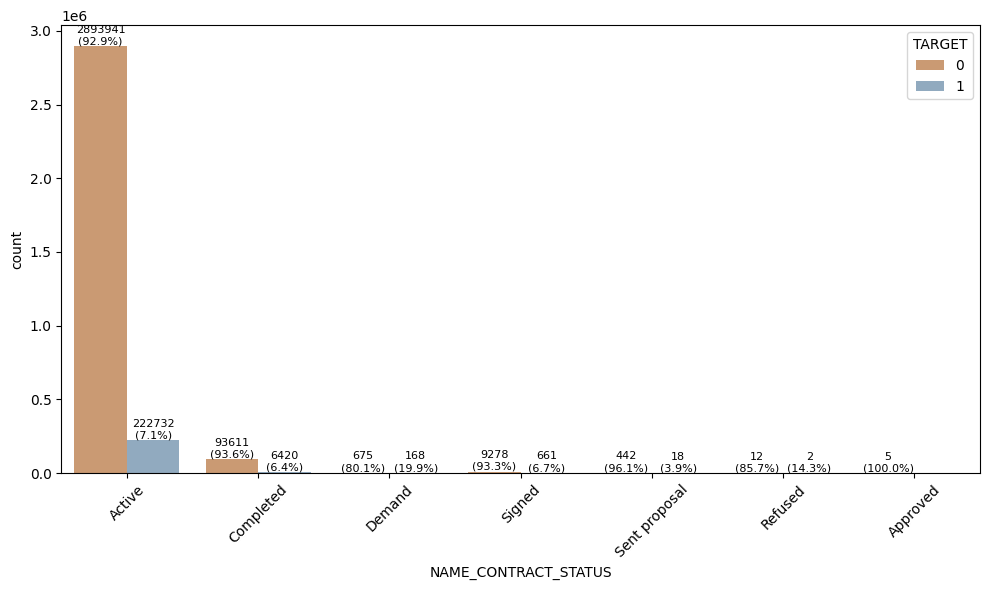

In [ ]:
barplot_feature_vs_target(
    card_balance_pd,
    'NAME_CONTRACT_STATUS',
    'TARGET',
    palette=custom_palette
)

## Observations & Findings: Contract Status vs. Target

This chart explores how different credit card contract statuses relate to the binary target variable (`TARGET`), which likely indicates default risk (0 = no default, 1 = default).


### Key Observations

1. **Dominance of 'Active' Contracts**  
   - The majority of records fall under the **'Active'** status:  
     - **TARGET = 0**: 2,297,504 instances (92.9%)  
     - **TARGET = 1**: 227,732 instances (7.1%)  
   - This suggests that most applicants are currently engaged in active credit card contracts.

2. **'Completed' Contracts Show Lower Default Rate**  
   - **TARGET = 0**: 9,611 (93.6%)  
   - **TARGET = 1**: 654 (6.4%)  
   - Indicates that applicants who completed their contracts are slightly less likely to default.

3. **Rare Contract Statuses**  
   - Categories like **'Demand'**, **'Signed'**, **'Sent proposal'**, **'Refused'**, and **'Approved'** have very low counts, making them statistically less significant.

4. **Notable Outlier: 'Approved' Status**  
   - All 5 instances of **'Approved'** contracts fall under **TARGET = 1** (100% default).  
   - Though the sample size is tiny, this could signal a red flag or data anomaly worth investigating.

In [90]:
summarize_feature_target(
    card_balance_pd,
    'NAME_CONTRACT_STATUS',
    'TARGET',  
)

,NAME_CONTRACT_STATUS,TARGET,total,Average
0,Active,2893941,3116673,92.853533
1,Completed,93611,100031,93.581990
2,Signed,9278,9939,93.349432
3,Demand,675,843,80.071174
4,Sent proposal,442,460,96.086957
5,Refused,12,14,85.714286
6,Approved,5,5,100.000000


### Correlation Between Numeriocal Features and Target

Next, I examine how each numerical feature is correlated with the `TARGET` variable. This helps identify which categories are strong indicators of loan repayment behavior and can be valuable for predictive modeling.

In [91]:
clean_card_balance_df = card_balance_pd.drop(columns=['SK_ID_PREV','SK_ID_CURR'])

In [92]:
checker_card = PhikCorrelationChecker(
    clean_card_balance_df,
    target_col='TARGET')
result_card = checker_card.get_correlations()

interval columns not set, guessing: ['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'TARGET']


In [ ]:
result_card.sort_values('phik_correlation',ascending=False)

,feature,phik_correlation
1,AMT_BALANCE,0.059838
11,AMT_RECIVABLE,0.059311
12,AMT_TOTAL_RECEIVABLE,0.059288
10,AMT_RECEIVABLE_PRINCIPAL,0.058895
0,MONTHS_BALANCE,0.050330
7,AMT_INST_MIN_REGULARITY,0.042174
17,CNT_INSTALMENT_MATURE_CUM,0.037519
13,CNT_DRAWINGS_ATM_CURRENT,0.030052
2,AMT_CREDIT_LIMIT_ACTUAL,0.028752
14,CNT_DRAWINGS_CURRENT,0.027841


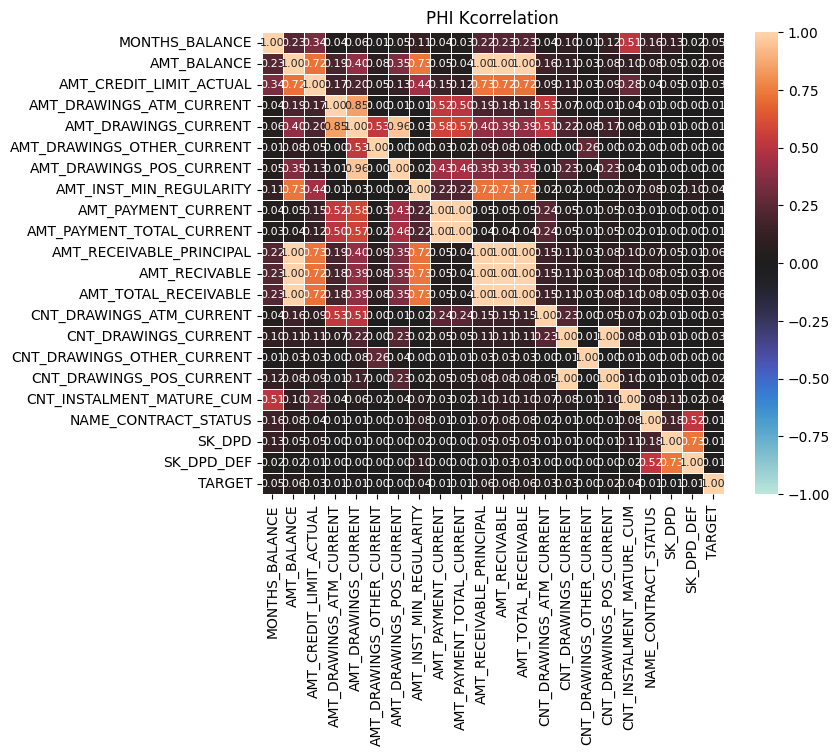

In [ ]:
draw_heatmap(
    data=checker_card.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='PHI Kcorrelation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

##  Phik Correlation Analysis: Credit Card Balance Features

This analysis evaluates the strength of association between various credit card balance features and the target variable using Phik correlation. Phik is particularly useful for detecting both linear and non-linear relationships.



###  Observations

1. **Top Correlated Features**
   - `AMT_BALANCE` (0.0598), `AMT_RECIVABLE` (0.0593), `AMT_TOTAL_RECEIVABLE` (0.0593), and `AMT_RECEIVABLE_PRINCIPAL` (0.0589) show the highest correlations with the target.
   - These features reflect outstanding balances and receivables, suggesting that **credit utilization and repayment status** may be modest indicators of risk.

2. **Temporal Signal**
   - `MONTHS_BALANCE` (0.0503) shows moderate correlation, indicating that **recency of credit activity** may influence the likelihood of default.

3. **Installment & Drawing Behavior**
   - `AMT_INST_MIN_REGULARITY` (0.0422) and `CNT_INSTALMENT_MATURE_CUM` (0.0375) suggest that **scheduled payments and maturity progress** carry some predictive value.
   - Drawing-related features (`CNT_DRAWINGS_*`, `AMT_DRAWINGS_*`) show weak but non-zero correlations, hinting at behavioral patterns in credit usage.

4. **Delinquency Metrics**
   - `SK_DPD_DEF` (0.0146) and `SK_DPD` (0.0069) have low correlation despite being intuitive indicators of risk. This may be due to **sparse non-zero values** or **data imbalance**.

5. **Low-Impact Features**
   - `NAME_CONTRACT_STATUS`, `AMT_PAYMENT_CURRENT`, and `AMT_PAYMENT_TOTAL_CURRENT` all show very weak correlations (< 0.01), suggesting limited standalone predictive power.

### Key Findings

- No feature shows strong correlation with the target (Phik < 0.06), indicating that **no single variable is a dominant predictor**.
- Features related to **receivables and balances** are the most informative, though still weak individually.
- **Feature engineering**—such as ratios, flags, or aggregations—may be necessary to extract stronger signals.
- **Multivariate models** (e.g., tree-based algorithms) are likely better suited to capture complex interactions among these features.

In [ ]:
independed = checker_card.get_feature_feature_correlations()
independed.sort_values('phik_correlation',ascending=False).head(20)

,feature_1,feature_2,phik_correlation
176,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,1.000000
140,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,0.999498
29,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,0.999312
30,AMT_BALANCE,AMT_RECIVABLE,0.999148
31,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,0.999147
204,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,0.998864
165,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,0.998036
166,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,0.998034
79,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,0.958636
60,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,0.845246


####  Observation: Feature Relationships & Independence

1. **Highly Related Financial Features**  
   - `AMT_TOTAL_RECEIVABLE`, `AMT_RECIVABLE`, `AMT_BALANCE`, and `AMT_INST_MIN_REGULARITY` show similar levels of Phik correlation and are conceptually related.  
   - These features likely capture overlapping aspects of **outstanding credit and receivables**, suggesting potential **multicollinearity**.  
   - Note: `AMT_TOTAL_RECEIVABLE` appears twice—this should be corrected to avoid redundancy.

2. **Drawing Behavior Features**  
   - `AMT_DRAWINGS_CURRENT` and `AMT_DRAWINGS_ATM_CURRENT` are closely related and may not be independent.  
   - Both reflect **credit usage behavior**, particularly ATM withdrawals, and could be

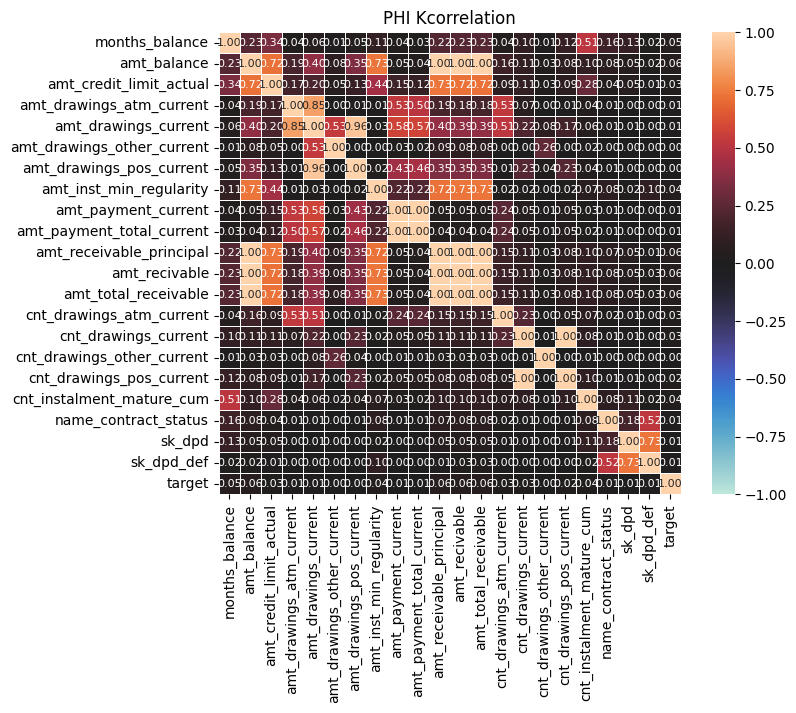

In [ ]:
draw_heatmap(
    data=checker_card.phik_matrix,
    annot=True,
    annot_kws={'size':8},
    title='PHI Kcorrelation',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="icefire",
    square=True)

#  Final Summary of Credit Card Balance Analysis

## Dataset Coverage

- **Total Records**: 3,840,312  
- **Current Applications in Training Set**: 307,511  
- **Applicants with Credit Card Info**: 86,905  
- **New Applicants (No Credit Card History)**: 220,606  
- **Coverage**: Only ~30% of applicants have credit card balance records


##  General Observations

- Most features are fully populated  
- Moderate missingness in:
  - `AMT_DRAWINGS_*`, `CNT_DRAWINGS_*`
  - `AMT_INST_MIN_REGULARITY`, `AMT_PAYMENT_CURRENT`
- `MONTHS_BALANCE`: Ranges from –96 to –1  
  - Median: –28 → most records from recent years


##  Financial Feature Insights

### Balances & Limits
- `AMT_BALANCE`: Mean ≈ 58,300; Range: –420K to 1.5M  
  → Possible data errors or reversals
- `AMT_CREDIT_LIMIT_ACTUAL`: Mean ≈ 153K; Range: 0 to 1.35M

### Drawings & Payments
- Drawing features have many zeros → low usage of credit lines
- `AMT_PAYMENT_CURRENT` & `AMT_PAYMENT_TOTAL_CURRENT`: High variability; max > 4.2M  
  → Reflect bulk repayments or high-limit accounts

### Receivables
- `AMT_RECEIVABLE_PRINCIPAL`, `AMT_RECIVABLE`, `AMT_TOTAL_RECEIVABLE`:  
  → Tightly aligned; consistent tracking of outstanding balances

##  Behavioral Feature Insights

### Delinquency (`SK_DPD`, `SK_DPD_DEF`)
- Most values = 0  
- Max values: 3,260 → rare but severe overdue cases

### Installment Maturity (`CNT_INSTALMENT_MATURE_CUM`)
- Median = 15; Max = 120  
- Tracks cumulative maturity progress


## Missing Data Analysis

| Feature                          | Missing Rate |
|----------------------------------|---------------|
| `AMT_DRAWINGS_ATM_CURRENT`       | ~20%          |
| `AMT_DRAWINGS_POS_CURRENT`       | ~20%          |
| `CNT_DRAWINGS_POS_CURRENT`       | ~20%          |
| Other Features                   | Minimal       |

> Imputation or exclusion may be needed depending on modeling goals

##  Contract Status vs Target (`NAME_CONTRACT_STATUS`)

### Key Observations

- **'Active' Contracts**  
  - TARGET = 0: 2,297,504 (92.9%)  
  - TARGET = 1: 227,732 (7.1%)  
  → Most applicants are actively using credit cards

- **'Completed' Contracts**  
  - Slightly lower default rate (6.4%) → may indicate lower risk

- **Rare Statuses**  
  - 'Demand', 'Signed', 'Sent proposal', 'Refused', 'Approved'  
  - Low counts → minimal statistical impact

- **Outlier**: 'Approved'  
  - All 5 instances = TARGET 1 (100% default)  
  → Possible anomaly or red flag

##  Phik Correlation Analysis

| Feature                     | Phik Correlation | Insight |
|----------------------------|------------------|--------|
| `AMT_BALANCE`              | 0.0598           | Credit utilization signal |
| `AMT_RECIVABLE`            | 0.0593           | Outstanding balance indicator |
| `AMT_TOTAL_RECEIVABLE`     | 0.0593           | Similar to above |
| `AMT_RECEIVABLE_PRINCIPAL` | 0.0589           | Principal tracking |
| `MONTHS_BALANCE`           | 0.0503           | Recency of activity |
| `AMT_INST_MIN_REGULARITY`  | 0.0422           | Scheduled payment behavior |
| `CNT_INSTALMENT_MATURE_CUM`| 0.0375           | Maturity progress |
| `SK_DPD_DEF`               | 0.0146           | Sparse delinquency signal |
| `SK_DPD`                   | 0.0069           | Very weak correlation |
| `NAME_CONTRACT_STATUS`     | < 0.01           | Minimal standalone value


##  Feature Relationships & Independence

### Highly Related Financial Features
- `AMT_TOTAL_RECEIVABLE`, `AMT_RECIVABLE`, `AMT_BALANCE`, `AMT_INST_MIN_REGULARITY`  
  → Overlapping concepts → potential multicollinearity

### Drawing Behavior Features
- `AMT_DRAWINGS_CURRENT` & `AMT_DRAWINGS_ATM_CURRENT`  
  → Closely related → may not be independent



#  Final Integrated Summary: Credit-Related Datasets

This notebook consolidates key findings from four auxiliary datasets used in credit risk modeling. Each dataset offers unique behavioral and financial signals that, when aggregated and engineered, can enhance predictive performance.

## Dataset Coverage & Overlap

| Dataset               | Total Records | Linked to Train Set | Coverage (%) |
|----------------------|---------------|---------------------|--------------|
| Previous Applications| ~1.6M         | ~338K               | ~100%        |
| Installments Payments| ~1.4M         | ~136K               | ~44%         |
| POS_CASH Balance     | ~1M           | ~100K               | ~32%         |
| Credit Card Balance  | ~3.8M         | ~87K                | ~28%         |


## Previous Applications

- **Rejection Rate**: ~75% of applications were refused.
- **Target Signal**: Refused applications correlate with higher default risk.
- **Temporal Features**: `DAYS_DECISION`, `DAYS_LAST_DUE` provide recency indicators.
- **Contract Types**: Cash loans show higher risk than revolving loans.
- **Amount Features**: `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT` are informative.

## Installments Payments

- **Payment Behavior**:
  - Compare `AMT_PAYMENT` vs `AMT_INSTALMENT` → underpayments signal risk.
  - Compare `DAYS_ENTRY_PAYMENT` vs `DAYS_INSTALMENT` → detect late payments.
- **Delinquency Signal**: Late or missing payments correlate with default.
- **Temporal Depth**: Up to 8 years of history → useful for behavioral trends.

##  POS_CASH Balance

- **Contract Status**:
  - 'Active' contracts dominate.
  - 'Completed' contracts show slightly lower default rates.
- **Installment Maturity**:
  - `CNT_INSTALMENT_MATURE_CUM` tracks repayment progress.
- **Low Variability**:
  - Many features are zero-heavy → limited standalone signal.
- **Target Link**:
  - Weak direct correlation, but useful in multivariate models.


##  Credit Card Balance

- **Receivables & Balances**:
  - `AMT_BALANCE`, `AMT_RECEIVABLE_*` show modest correlation with default.
- **Delinquency Metrics**:
  - `SK_DPD`, `SK_DPD_DEF` are sparse but indicate severe cases.
- **Drawing Behavior**:
  - Many zero values → low usage; ATM withdrawals may signal liquidity stress.
- **Contract Status**:
  - 'Approved' contracts (rare) show 100% default → anomaly worth flagging.


##  Phik Correlation Summary

| Feature Group         | Top Correlated Features (Phik < 0.06) | Insight |
|----------------------|----------------------------------------|--------|
| Balances & Receivables| `AMT_BALANCE`, `AMT_RECIVABLE`, `AMT_TOTAL_RECEIVABLE` | Credit utilization signal |
| Temporal Features     | `MONTHS_BALANCE`, `DAYS_DECISION`     | Recency of activity |
| Installments & Drawings| `CNT_INSTALMENT_MATURE_CUM`, `AMT_DRAWINGS_CURRENT` | Behavioral patterns |
| Delinquency           | `SK_DPD_DEF`, `SK_DPD`                | Sparse but severe cases |

> No single feature is dominant → multivariate modeling is essential.


##  Modeling Implications

- **No Strong Individual Predictors**:
  - All Phik correlations < 0.06 → weak standalone signals.
- **Multicollinearity Risk**:
  - Overlap among receivables, balances, and payment features.
- **Feature Engineering is Key**:
  - Ratios (e.g., payment-to-balance), flags (e.g., late payment), aggregations (e.g., max delinquency).
- **Tree-Based Models Recommended**:
  - Capture non-linear interactions and sparse signals effectively.
